In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import matplotlib.pylab as plt
import argparse
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy
from RecoPulseLikelihoodRatio import likelihoodfit
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import csv

In [5]:
read_file = open('/data/p-one/akatil/analysis/RecoPulses/RecoPulseFitInfo_correcectedchi2.csv', 'r')

file_num, frame_num, lepton, DOM, string = ([]), ([]), ([]), ([]), ([])
binEntries_mean, success_biGauss, success_doublePeak = ([]), ([]), ([])
biGauss_pos, biGauss_wid, biGauss_rat, biGauss_amp = ([]), ([]), ([]), ([])
doublePeak_amp1, doublePeak_amp2, doublePeak_pos1, doublePeak_pos2 = ([]), ([]), ([]), ([])
doublePeak_rat1, doublePeak_rat2, doublePeak_wid1, doublePeak_wid2 = ([]), ([]), ([]), ([])
area_data, area_biGauss_fit, area_doublePeak_fit = ([]), ([]), ([])
gof_biGauss, gof_doublePeak = ([]), ([])
with read_file:

    reader = csv.DictReader(read_file)
    
    for row in reader:
        file_num = np.append(file_num, row['file'])
        frame_num = np.append(frame_num, row['frame'])
        lepton =np.append(lepton, row['lepton_type'])
        DOM = np.append(DOM, row['DOM']) #DOM and string have been interchanged
        string = np.append(string, row['string'])
        binEntries_mean = np.append(binEntries_mean, float(row['binEntries_mean']))
        success_biGauss = np.append(success_biGauss, row['success_biGauss'])
        success_doublePeak = np.append(success_doublePeak, row['success_doublePeak'])
        biGauss_pos = np.append(biGauss_pos, float(row['biGauss_pos']))
        biGauss_wid = np.append(biGauss_wid, float(row['biGauss_wid']))
        biGauss_rat = np.append(biGauss_rat, float(row['biGauss_rat']))
        biGauss_amp = np.append(biGauss_amp, float(row['biGauss_amp']))
        doublePeak_pos1 = np.append(doublePeak_pos1, float(row['doublePeak_pos1']))
        doublePeak_wid1 = np.append(doublePeak_wid1, float(row['doublePeak_wid1']))
        doublePeak_rat1 = np.append(doublePeak_rat1, float(row['doublePeak_rat1']))
        doublePeak_amp1 = np.append(doublePeak_amp1, float(row['doublePeak_amp1']))
        doublePeak_pos2 = np.append(doublePeak_pos2, float(row['doublePeak_pos2']))
        doublePeak_wid2 = np.append(doublePeak_wid2, float(row['doublePeak_wid2']))
        doublePeak_rat2 = np.append(doublePeak_rat2, float(row['doublePeak_rat2']))
        doublePeak_amp2 = np.append(doublePeak_amp2, float(row['doublePeak_amp2']))
        area_data = np.append(area_data, float(row['area_data']))
        area_biGauss_fit = np.append(area_biGauss_fit, float(row['area_biGauss_fit']))
        area_doublePeak_fit = np.append(area_doublePeak_fit, float(row['area_doublePeak_fit']))
        gof_biGauss = np.append(gof_biGauss, float(row['gof_biGauss']))
        gof_doublePeak = np.append(gof_doublePeak, float(row['gof_doublePeak']))

In [6]:
'''
Selecting DOMs with goodness of fit < 2, only double peak fit chi2 values are considered
'''
gof_bool_biGauss = (gof_biGauss > 0)&(gof_biGauss < 2)
gof_bool_dp = (gof_doublePeak > 0)&(gof_doublePeak < 2)

select_gof_biGauss = gof_biGauss[gof_bool_dp]
select_gof_dp = gof_doublePeak[gof_bool_dp]
select_file_num = file_num[gof_bool_dp]
select_frame_num = frame_num[gof_bool_dp]
select_string = DOM[gof_bool_dp]
select_DOM = string[gof_bool_dp]

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [7]:
gof_biGauss

array([12.9562574 ,  1.94526641,  9.48373854, ..., 14.77778603,
       10.41280474,  8.01624411])

1392
OMKey(9,19,0)
Now Histogramming
1420
OMKey(2,4,0)
Now Histogramming
1461
OMKey(4,4,0)
Now Histogramming
1465
OMKey(4,5,0)
Now Histogramming
1470
OMKey(8,18,0)
Now Histogramming
1548
OMKey(5,1,0)
Now Histogramming
1587
OMKey(3,10,0)
Now Histogramming
1626
OMKey(7,17,0)
Now Histogramming
('PARAMETERS -', 205.4844022069717, 256.96501592267566, 204.18885740713324, 75.27315573596296, 227.74341719616234, 187.21449367119305, 198.1133914139616, -567.6643581165962)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ -0.72855826,  20.        ,   1.        , 199.        ,
        24.48444198,  20.        ,   1.        , 199.        ]), -1422.7739802932583)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  0.27144174,  20.       

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in log


('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.00997086,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.39193687,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.62800485,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.77390288,    0.81295282,  161.0140373 ,
         37.21122967,   20.67890562,    0.95099269, -213.43016064]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  -1.72904759,   25.86407283,    0.81295282,  161.0140373 ,
         37.21122967,   20.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  164.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  166.22000026,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  164.60196626,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.22000023,
         39.79915864,   23.26683458,    3.53892166, -210.84223168]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   0.85888137,   28.5677948 ,    5.98881075,  165.60196624,
         39.79915864,   23.26

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.9493935 ,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   25.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   26.85476354,    6.12685062, -208.25430272]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   3.44681033,   31.15572377,    8.57673971,  168.77782418,
         44.97501656,   28.47

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.03062146,   11.18691553, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.03062146,   11.24264362, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.03062146,   11.27708548, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.03062146,   11.30270854, -205.66637376]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([   6.03473929,   33.74365273,   11.16466867,  171.36575314,
         47.56294552,   31.03

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  10.85873622,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61855042,   13.8906375 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.00463426,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61855042,   13.8906375 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.09480421,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61855042,   13.8906375 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.1505323 ,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61855042,   13.8906375 , -200.49051584]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  11.18497416,   36.33158169,   13.75259763,  173.9536821 ,
         50.15087448,   33.61

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.30147665,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.3916466 ,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.4473747 ,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.48181655,   16.34052659,  176.54161107,
         52.73880344,   36.20647938,   16.47856646, -197.90258687]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  13.79852618,   41.50743961,   16.34052659,  176.54161107,
         52.73880344,   36.20

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   19.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   21.54648956,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   19.92845556,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   20.54648953,  179.12954003,
         55.32673241,   38.79440835,   19.06649542, -195.31465791]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  16.38645514,   44.09536857,   20.92845554,  179.12954003,
         55.32673241,   38.79

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  182.71746899,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  183.33550296,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  183.71746897,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  183.95353695,
         57.91466137,   41.38233731,   21.65442439, -192.72672895]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  18.9743841 ,   46.68329753,   24.10431348,  184.09943499,
         57.91466137,   41.38

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.89332691,
         62.73865829,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.89332691,
         62.88455633,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.89332691,
         62.97472628,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.89332691,
         63.03045437,   43.97026627,   24.24235335, -190.13879999]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  21.56231306,   49.2712265 ,   26.69224244,  186.89332691,
         63.06489623,   43.97

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.48125587,
         65.67844825,   49.08605928,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.48125587,
         65.67844825,   49.12050113,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.48125587,
         65.67844825,   49.14612419,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.48125587,
         65.67844825,   49.14612419,   26.83028231, -187.55087103]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  24.15024202,   51.85915546,   29.2801714 ,  189.48125587,
         65.67844825,   49.14

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -183.34490809]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.96294208]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.7268741 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.26637721,   51.73405315,   32.00614023, -182.58097606]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  26.73817099,   54.44708442,   31.86810036,  192.06918483,
         68.26637721,   51.73

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.65304738,   34.45602932,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   58.03501338,   34.45602932,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   58.65304736,   34.45602932,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.03501337,   34.45602932,  194.6571138 ,
         70.85430617,   54.32198212,   34.59406919, -179.78708414]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  31.91402891,   59.27108135,   34.45602932,  194.6571138 ,
         70.85430617,   54.32

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  197.24504276,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  197.24504276,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  198.24504276,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  199.86307676,
         73.44223514,   56.90991108,   37.18199816, -177.19915518]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  34.50195787,   62.2108713 ,   39.63188725,  198.24504276,
         73.44223514,   56.90

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.03016408,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.26623206,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.4121301 ,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.50230005,   59.49784004,   39.76992712, -174.61122622]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  37.08988683,   64.79880027,   42.21981621,  202.42090068,
         78.55802814,   59.49

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   64.67369796,   44.59392404, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   64.67369796,   44.73982208, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   64.67369796,   44.82999203, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   64.67369796,   44.88572012, -172.02329726]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  39.67781579,   67.38672923,   44.80774517,  205.00882964,
         81.20602202,   64.67

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  43.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.88377876,   69.97465819,   47.39567413,  207.5967586 ,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  43.26574476,   69.97465819,   47.39567413,  207.5967586 ,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  43.88377873,   69.97465819,   47.39567413,  207.5967586 ,
         83.79395098,   67.26162692,   47.533714  , -166.84743934]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  44.26574474,   69.97465819,   47.39567413,  207.5967586 ,
         83.79395098,   67.26

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   49.98360309,  210.18468757,
         86.38187994,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   49.98360309,  210.18468757,
         86.38187994,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   50.98360309,  210.18468757,
         86.38187994,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   52.60163709,  210.18468757,
         86.38187994,   69.84955588,   50.12164296, -164.25951037]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  47.44160268,   75.15051611,   50.98360309,  210.18468757,
         86.38187994,   69.84

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.24475248,
         88.96980891,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.30048057,
         88.96980891,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.33492243,
         88.96980891,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         88.96980891,   72.43748485,   52.70957192, -161.67158141]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  50.02953164,   77.73844507,   55.15946102,  215.36054549,
         88.96980891,   72.43

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         93.79380583,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         93.93970387,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.02987382,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.08560191,   75.02541381,   55.29750089, -159.08365245]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  52.6174606 ,   80.32637403,   57.74738998,  217.94847445,
         94.12004377,   75.02

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.4206104 ,
         94.14566683,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.4763385 ,
         94.14566683,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.51078035,
         94.14566683,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         94.14566683,   77.61334277,   57.88542985, -156.49572349]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  55.20538956,   82.914303  ,   60.33531894,  220.53640341,
         94.14566683,   77.61

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.26145984,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.29590169,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.32152475,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.32152475,   80.20127173,   60.47335881, -153.90779453]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  57.79331852,   85.50223196,   62.9232479 ,  223.12433237,
         99.32152475,   81.20

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.90945371,   85.37712965,   64.06128777, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.90945371,   85.37712965,   64.67932175, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.90945371,   85.37712965,   65.06128776, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.90945371,   85.37712965,   65.29735574, -151.31986557]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  60.38124749,   88.09016092,   65.51117686,  225.71226133,
        101.90945371,   85.37

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.3001903 ,
        104.49738267,   87.96505862,   68.23714569, -147.11390263]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.3001903 ,
        104.49738267,   87.96505862,   68.23714569, -146.73193662]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.3001903 ,
        104.49738267,   87.96505862,   68.23714569, -146.49586864]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.3001903 ,
        104.49738267,   87.96505862,   68.23714569, -146.3499706 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  61.39171118,   90.67808988,   68.09910583,  228.3001903 ,
        104.49738267,   87.96

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.13850185,  107.11444569,   70.98579965,  101.19468995,
         85.40732431,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.2286718 ,  107.11444569,   70.98579965,  101.19468995,
         85.40732431,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.28439989,  107.11444569,   70.98579965,  101.19468995,
         85.40732431,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.31884175,  107.11444569,   70.98579965,  101.19468995,
         85.40732431,   90.55298758,   70.82507466, -143.55607868]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  86.34446481,  107.11444569,   70.98579965,  101.19468995,
         85.40732431,   90.55

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  110.70237465,   73.57372861,  103.78261891,
         87.99525327,   93.14091654,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  112.32040865,   73.57372861,  103.78261891,
         87.99525327,   93.14091654,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  110.70237465,   73.57372861,  103.78261891,
         87.99525327,   93.14091654,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  111.32040863,   73.57372861,  103.78261891,
         87.99525327,   93.14091654,   73.41300362, -140.96814972]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  88.93239377,  111.70237464,   73.57372861,  103.78261891,
         87.99525327,   93.14

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.39772554,  106.37054787,
         90.58318223,   95.7288455 ,   76.00093258, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.54362358,  106.37054787,
         90.58318223,   95.7288455 ,   76.00093258, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.63379352,  106.37054787,
         90.58318223,   95.7288455 ,   76.00093258, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.68952162,  106.37054787,
         90.58318223,   95.7288455 ,   76.00093258, -138.38022076]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  91.52032273,  114.87823257,   78.72396348,  106.37054787,
         90.58318223,   95.72

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         93.1711112 ,   98.31677446,   78.58886154, -135.7922918 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         93.1711112 ,   98.31677446,   78.58886154, -135.7922918 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         94.1711112 ,   98.31677446,   78.58886154, -135.7922918 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         95.7891452 ,   98.31677446,   78.58886154, -135.7922918 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  94.10825169,  117.46616154,   81.3375155 ,  111.5464058 ,
         94.1711112 ,   98.31

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  102.5227374 ,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  102.90470341,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.14077139,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.28666943,   81.1767905 , -133.20436284]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  96.69618065,  120.0540905 ,   83.92544446,  114.13433476,
         98.34696912,  103.37

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.64201946,   86.51337342,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -130.61643387]), -1517.3279636773789)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.64201946,   86.51337342,  116.72226372,
        100.93489808,   88.35702532,   85.58960044, -130.61643387]), -1517.3279636773789)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.64201946,   86.51337342,  116.72226372,
        100.93489808,   88.35702532,   85.27452395, -130.61643387]), -1517.3279582325363)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.64201946,   86.51337342,  116.72226372,
        100.93489808,   88.35702532,   85.89255793, -130.61643387]), -1517.327958257785)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([  99.28410962,  122.642019

(array([ 101.87203858,  125.22994842,   89.10130238,  119.31019268,
        103.52282704,   90.94495428,   88.06173639, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  119.31019268,
        103.52282704,   90.94495428,   88.11746448, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  119.31019268,
        103.52282704,   90.94495428,   88.15190634, -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -268.35300345]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 101.87203858,  125.22994842,   89.10130238,  119.31019268,
        103.52282704,   90.94495428,   88.1775294 , -268.35300345]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 105.45996754,  127.81787738,   91.68923134,  121.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 107.07800154,  127.81787738,   91.68923134,  121.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 105.45996754,  127.81787738,   91.68923134,  121.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 106.07800151,  127.81787738,   91.68923134,  121.89812164,
        106.110756  ,   93.53288324,   90.76545836, -263.17714553]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 106.45996752,  127.81787738,   91.68923134,  121.89812164,
        106.110756  ,   93.53

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   95.2771603 ,  124.48605061,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.8951943 ,  124.48605061,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   95.2771603 ,  124.48605061,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   95.89519428,  124.48605061,
        108.69868497,   96.1208122 ,   93.35338732, -260.58921657]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 109.63582546,  132.99373531,   96.27716029,  124.48605061,
        108.69868497,   96.12

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.07397955,
        111.28661393,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.31004753,
        111.28661393,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.45594557,
        111.28661393,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.54611552,
        111.28661393,   98.70874116,   95.94131629, -258.00128761]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 112.22375442,  135.58166427,   99.45301823,  129.60184361,
        111.28661393,   98.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  101.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  102.29667013,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  103.91470413,   98.52924525, -255.41335865]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 114.81168338,  138.16959323,  102.04094719,  132.24983749,
        116.46247185,  102.29

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  104.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  106.50263309,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  104.88459909,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  105.50263306,  101.11717421, -252.82542968]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 117.39961235,  140.75752219,  104.62887615,  134.83776645,
        119.05040081,  105.88

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  106.29303213, -248.61946675]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  106.29303213, -248.23750074]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  106.29303213, -248.00143276]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06045701,  106.29303213, -247.85553472]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 119.98754131,  143.34545115,  107.21680511,  137.42569541,
        121.63832977,  109.06

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  146.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  148.55141411,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  146.93338011,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  147.55141409,  109.80473407,  140.01362437,
        124.22625873,  111.64838597,  108.88096109, -245.0616428 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 125.16339923,  147.9333801 ,  109.80473407,  140.01362437,
        124.22625873,  111.64

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  145.21958734,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  143.60155334,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  144.21958731,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  144.60155332,
        126.8141877 ,  114.23631493,  111.46889005, -242.47371384]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 127.75132819,  151.10923804,  114.980592  ,  144.8376213 ,
        126.8141877 ,  114.23

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.87425261,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.9299807 ,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.96442256,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  116.8242439 ,  114.05681902, -239.88578488]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 130.33925715,  153.697167  ,  117.56852096,  147.77741126,
        131.99004562,  116.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  116.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  117.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  119.26278198, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  120.15644992,  150.36534022,
        134.57797458,  122.00010182,  117.64474798, -237.29785591]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 132.92718612,  156.28509596,  120.15644992,  150.36534022,
        134.57797458,  122.00

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 135.51511508,  158.87302492,  122.74437888,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 136.51511508,  158.87302492,  122.74437888,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 138.13314908,  158.87302492,  122.74437888,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 136.51511508,  158.87302492,  122.74437888,  152.95326918,
        137.16590354,  115.63041579,  119.68017146, -380.92607806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 137.13314905,  158.87302492,  122.74437888,  152.95326918,
        137.16590354,  115.63

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  163.84291989,  125.33230784,  155.54119814,
        139.7538325 ,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  163.93308983,  125.33230784,  155.54119814,
        139.7538325 ,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  163.98881793,  125.33230784,  155.54119814,
        139.7538325 ,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.02325978,  125.33230784,  155.54119814,
        139.7538325 ,  118.21834476,  122.26810042, -378.3381491 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 140.690973  ,  164.04888284,  125.33230784,  155.54119814,
        139.7538325 ,  118.21

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.60126306,
        142.34176147,  120.80627372,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.65699115,
        142.34176147,  120.80627372,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.69143301,
        142.34176147,  120.80627372,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        142.34176147,  120.80627372,  124.85602938, -375.75022014]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 143.27890196,  166.63681181,  130.50816577,  160.71705607,
        142.34176147,  120.80

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.01223665,  127.44395834, -373.16229118]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.39420266,  127.44395834, -373.16229118]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.63027064,  127.44395834, -373.16229118]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.77616868,  127.44395834, -373.16229118]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 145.86683092,  169.22474077,  133.09609473,  163.30498503,
        147.51761939,  125.86

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 148.45475988,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.59419321, -370.57436222]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 148.45475988,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -370.57436222]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 148.45475988,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -370.57436222]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 148.45475988,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.5700606 ,  132.61981627, -369.57436222]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 148.45475988,  171.81266973,  135.68402369,  165.89291399,
        150.10554835,  128.57

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.60499475,  174.40059869,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  174.40059869,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  174.40059869,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  175.40059869,  138.27195265,  168.48084295,
        152.69347731,  131.15798956,  135.20774523, -365.39850429]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 153.63061781,  177.01863269,  138.27195265,  168.48084295,
        152.69347731,  131.15

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 155.63061779,  176.98852765,  140.85988161,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 155.86668577,  176.98852765,  140.85988161,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.01258381,  176.98852765,  140.85988161,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.10275376,  176.98852765,  140.85988161,  171.06877191,
        155.28140627,  133.74591853,  137.79567419, -362.81057533]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 156.15848185,  176.98852765,  140.85988161,  171.06877191,
        155.28140627,  133.74

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  145.06584455,  173.65670087,
        157.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  145.44781056,  173.65670087,
        157.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  145.68387854,  173.65670087,
        157.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  145.82977658,  173.65670087,
        157.86933523,  136.33384749,  140.38360315, -360.22264637]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 158.80647573,  182.16438557,  145.91994653,  173.65670087,
        157.86933523,  136.33

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        160.4572642 ,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        160.4572642 ,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        161.4572642 ,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        163.0752982 ,  138.92177645,  142.97153211, -357.63471741]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 161.39440469,  184.75231454,  148.6236685 ,  178.8325588 ,
        161.4572642 ,  138.92

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  143.12773938,  145.55946108, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  143.50970539,  145.55946108, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  143.74577338,  145.55946108, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  143.89167141,  145.55946108, -355.04678845]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 163.98233365,  187.3402435 ,  151.21159746,  181.42048776,
        165.63312212,  143.98

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -530.44259949]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -354.07689349]), -1611.7002855686603)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -421.44259674]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.22105108,  137.65378874,  144.18266857, -463.07689179]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 166.57026262,  189.92817246,  153.79952642,  184.00841672,
        168.2

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.72049748,  192.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  192.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  192.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  193.51610142,  156.38745538,  186.59634568,
        170.80898004,  140.2417177 ,  146.77059753, -525.84280367]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 171.74612054,  195.13413542,  156.38745538,  186.59634568,
        170.80898004,  140.24

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.21145231,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.35735035,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.44752029,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.50324839,  189.18427464,
        173.396909  ,  142.82964667,  149.35852649, -523.25487471]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 174.3340495 ,  197.69195934,  161.53769024,  189.18427464,
        173.396909  ,  142.82

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.33450951,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        175.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        176.98483797,  145.41757563,  151.94645545, -520.66694574]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 176.92197846,  200.27988831,  164.15124227,  194.36013257,
        178.60287197,  145.41

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  150.24157255,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  150.38747059,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  150.47764054,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  150.53336863,  154.53438441, -518.07901678]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 179.50990742,  202.86781727,  166.73917123,  196.94806153,
        181.16069589,  150.56

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  159.71024233, -515.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  159.71024233, -514.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  159.71024233, -512.87305382]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18136251,  159.71024233, -514.49108782]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 182.09783638,  205.45574623,  169.32710019,  199.53599049,
        183.74862485,  153.18

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.06773135,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -510.3152299 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.1579013 ,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -510.3152299 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.21362939,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -510.3152299 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.24807125,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76929147,  162.2981713 , -510.3152299 ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.27369431,  208.04367519,  171.91502915,  202.12391945,
        186.33655381,  155.76

(array([ 189.86162327,  213.21953311,  177.12099211,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.86162327,  213.21953311,  175.50295811,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.86162327,  213.21953311,  176.12099209,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.86162327,  213.21953311,  176.5029581 ,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.86162327,  213.21953311,  176.73902608,  204.71184841,
        188.92448277,  158.35722043,  164.88610026, -507.72730094]), nan)
('*****************Dou

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.67881603,  209.53584534,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.67881603,  209.68174338,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.67881603,  209.77191333,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.67881603,  209.82764142,
        191.51241173,  160.9451494 ,  167.47402922, -505.13937198]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.44955223,  215.80746207,  179.67881603,  209.86208328,
        191.51241173,  160.94

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.4823067 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.57247665,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.62820474,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.6626466 ,  163.53307836,  170.06195818, -502.55144301]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.03748119,  218.39539104,  182.266745  ,  212.4756353 ,
        196.68826966,  163.53

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.68331322,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.70893628,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.70893628,  172.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.70893628,  173.64988714, -499.96351405]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.62541015,  220.98332   ,  184.85467396,  215.06356426,
        199.27619862,  168.70

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.20406466, -497.37558509]), -1645.207736580781)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.26413894, -497.37558509]), -1645.2077365782932)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.2341018 , -497.37558509]), -1645.207736587776)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.57124896,  187.44260292,  217.65149322,
        201.86412758,  161.33520406,  172.2341018 , -496.37558509]), -1644.9564522342707)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.21333912,  223.5712489

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 183.81107553,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.19304154,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.42910952,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.57500756,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.92313302,  174.82203076, -590.95571877]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 184.66517751,  233.67365527,  180.89749675,   51.98179508,
        204.45205654,  163.92

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.73372018,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.78944828,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.82389013,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  183.48542571,   54.56972404,
        207.0399855 ,  166.51106198,  177.40995972, -588.36778981]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 187.36889948,  238.84951319,  183.48542571,   54.56972404,
        207.0399855 ,  166.51

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   58.15765301,
        209.62791447,  169.09899094,  179.99788868, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   58.77568698,
        209.62791447,  169.09899094,  179.99788868, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.15765299,
        209.62791447,  169.09899094,  179.99788868, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.39372097,
        209.62791447,  169.09899094,  179.99788868, -585.77986085]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 189.95682844,  241.43744215,  188.66128364,   59.53961901,
        209.62791447,  169.09

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.68797938,  171.6869199 ,  182.58581764, -583.19193189]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.74370747,  171.6869199 ,  182.58581764, -583.19193189]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.77814933,  171.6869199 ,  182.58581764, -583.19193189]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  171.6869199 ,  182.58581764, -583.19193189]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 192.5447574 ,  244.02537111,  191.2492126 ,   62.33351093,
        214.80377239,  171.68

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  246.61330008,  193.83714156,   64.92143989,
        217.39170135,  176.86277783,  186.17374661, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  246.61330008,  193.83714156,   64.92143989,
        217.39170135,  176.86277783,  186.79178058, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  246.61330008,  193.83714156,   64.92143989,
        217.39170135,  176.86277783,  187.17374659, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  246.61330008,  193.83714156,   64.92143989,
        217.39170135,  176.86277783,  187.40981457, -580.60400292]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 195.13268636,  246.61330008,  193.83714156,   64.92143989,
        217.39170135,  176.86

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.42507052,   67.50936885,
        219.97963031,  179.45070679,  190.34960453, -575.48820992]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.42507052,   67.50936885,
        219.97963031,  179.45070679,  190.34960453, -575.45376806]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.42507052,   67.50936885,
        219.97963031,  179.45070679,  190.34960453, -575.428145  ]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 200.30854428,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 197.72061532,  249.20122904,  196.42507052,   67.50936885,
        219.97963031,  179.45

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 201.92657826,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.30854427,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.54461225,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.69051029,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03863575,  192.93753349, -572.84021604]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 202.78068024,  251.789158  ,  199.01299948,   70.09729781,
        222.56755927,  182.03

('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  254.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  255.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  256.99512096,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  255.37708696,  201.60092845,   72.68522677,
        225.15548823,  184.62656471,  195.52546245, -570.25228708]), nan)
('*****************Double Peak***************', 57, OMKey(7,17,0))
(array([ 205.48440221,  255.99512094,  201.60092845,   72.68522677,
        225.15548823,  184.62

1635
OMKey(5,7,0)
Now Histogramming
1640
OMKey(1,16,0)
Now Histogramming
('PARAMETERS -', 209.04817919839417, 231.41663240939175, 212.9647827056562, 441.68983817408105, 250.85488905338747, 228.639154202329, 213.1559393168924, -1323.9690577841172)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-2.68732182e-01,  2.00000000e+01,  1.00000000e+00,  2.78000000e+02,
        2.50787166e+01,  2.00000000e+01,  1.00000000e+00,  2.78000000e+02]), -1842.7988006729665)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-2.68732182e-01,  2.00000000e+01,  1.00000000e+00,  2.78000000e+02,
        2.50787166e+01,  2.00000000e+01,  1.00000000e+00,  2.78000000e+02]), -1842.7988006729665)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  0.73126782,  20.        ,   1.        , 278.        ,
        25.07871659,  20.        ,   1.        , 278.        ]), -1713.585011786522)
('*****************Double Peak***************', 59, OMK

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-6.05525911e+00,  1.84129151e+01,  5.09215718e-01,  1.80959327e+02,
        5.22107118e+01,  1.28579587e+01,  8.91528940e-01, -3.35035847e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-3.16199565e+00,  1.92064576e+01,  7.54607859e-01,  2.29479663e+02,
        3.86447142e+01,  1.64289794e+01,  9.45764470e-01, -1.53617923e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-2.16199565e+00,  1.92064576e+01,  7.54607859e-01,  2.29479663e+02,
        3.86447142e+01,  1.64289794e+01,  9.45764470e-01, -1.53617923e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-5.43961648e-01,  1.92064576e+01,  7.54607859e-01,  2.29479663e+02,
        3.86447142e+01,  1.64289794e+01,  9.45764470e-01, -1.53617923e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-2.16199565e+00,  1.92064

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-5.74066687e-01,  2.17943865e+01,  3.34253682e+00,  2.32067592e+02,
        4.12326432e+01,  1.90169083e+01,  3.53369343e+00, -1.53359130e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.01386227,    24.38231549,     5.93046578,   234.65552125,
          43.82057213,    21.60483728,     6.12162239, -1531.00337471]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([-5.74066687e-01,  2.17943865e+01,  3.34253682e+00,  2.32067592e+02,
        4.12326432e+01,  1.90169083e+01,  3.53369343e+00, -1.53359130e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([ 4.25933313e-01,  2.17943865e+01,  3.34253682e+00,  2.32067592e+02,
        4.12326432e+01,  1.90169083e+01,  3.53369343e+00, -1.53359130e+03]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.04396731,    21.79438652,  

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.01386227,    24.38231549,     5.93046578,   234.65552125,
          43.82057213,    21.60483728,     6.12162239, -1531.06343962]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.01386227,    24.38231549,     5.93046578,   234.65552125,
          43.82057213,    21.60483728,     6.12162239, -1531.02899777]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.01386227,    24.38231549,     5.93046578,   234.65552125,
          43.82057213,    21.60483728,     6.12162239, -1531.00337471]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    4.60179124,    26.97024445,     8.51839474,   237.24345021,
          46.40850109,    24.19276624,     8.70955135, -1528.41544575]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    2.01386227,    24.38231549,     5.93046578,   234.655

(array([    4.60179124,    26.97024445,     8.51839474,   237.24345021,
          46.40850109,    24.19276624,     8.70955135, -1528.53123876]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    4.60179124,    26.97024445,     8.51839474,   237.24345021,
          46.40850109,    24.19276624,     8.70955135, -1528.47551066]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    4.60179124,    26.97024445,     8.51839474,   237.24345021,
          46.40850109,    24.19276624,     8.70955135, -1528.44106881]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    4.60179124,    26.97024445,     8.51839474,   237.24345021,
          46.40850109,    24.19276624,     8.70955135, -1528.41544575]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    7.1897202 ,    29.55817341,    11.10632371,   239.83137917,
          48.99643005,    26.7806952 ,    11.29748032, -1525

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    7.1897202 ,    29.55817341,    11.10632371,   239.83137917,
          48.99643005,    26.7806952 ,    11.29748032, -1525.8875817 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    7.1897202 ,    29.55817341,    11.10632371,   239.83137917,
          48.99643005,    26.7806952 ,    11.29748032, -1525.85313984]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    7.1897202 ,    29.55817341,    11.10632371,   239.83137917,
          48.99643005,    26.7806952 ,    11.29748032, -1525.82751678]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.41930814,
          51.58435901,    29.36862416,    13.88540928, -1523.23958782]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    7.1897202 ,    29.55817341,    11.10632371,   239.831

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.41930814,
          51.58435901,    29.36862416,    13.88540928, -1524.20948281]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.41930814,
          51.58435901,    29.36862416,    13.88540928, -1523.8275168 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.41930814,
          51.58435901,    29.36862416,    13.88540928, -1523.59144882]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.41930814,
          51.58435901,    29.36862416,    13.88540928, -1523.44555078]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([    9.77764916,    32.14610237,    13.69425267,   242.419

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   14.98361212,    34.73403133,    16.28218163,   245.0072371 ,
          54.17228798,    31.95655312,    16.47333824, -1520.65165886]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   13.36557812,    34.73403133,    16.28218163,   245.0072371 ,
          54.17228798,    31.95655312,    16.47333824, -1520.65165886]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   13.9836121 ,    34.73403133,    16.28218163,   245.0072371 ,
          54.17228798,    31.95655312,    16.47333824, -1520.65165886]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   14.36557811,    34.73403133,    16.28218163,   245.0072371 ,
          54.17228798,    31.95655312,    16.47333824, -1520.65165886]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   14.60164609,    34.73403133,    16.28218163,   245.007

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   17.54143604,    39.90988925,    18.87011059,   247.59516606,
          56.76021694,    34.54448209,    19.0612672 , -1518.0637299 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   17.54143604,    39.90988925,    18.87011059,   247.59516606,
          56.76021694,    34.54448209,    19.0612672 , -1518.0637299 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   17.54143604,    39.90988925,    19.87011059,   247.59516606,
          56.76021694,    34.54448209,    19.0612672 , -1518.0637299 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   17.54143604,    39.90988925,    21.48814459,   247.59516606,
          56.76021694,    34.54448209,    19.0612672 , -1518.0637299 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   17.54143604,    39.90988925,    19.87011059,   247.595

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   20.12936501,    42.49781822,    24.04596851,   252.183095  ,
          59.3481459 ,    37.13241105,    21.64919616, -1515.47580094]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   20.12936501,    42.49781822,    24.04596851,   252.41916298,
          59.3481459 ,    37.13241105,    21.64919616, -1515.47580094]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   20.12936501,    42.49781822,    24.04596851,   252.56506102,
          59.3481459 ,    37.13241105,    21.64919616, -1515.47580094]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   20.12936501,    42.49781822,    24.04596851,   252.65523097,
          59.3481459 ,    37.13241105,    21.64919616, -1515.47580094]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   20.12936501,    42.49781822,    24.04596851,   252.710

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   22.71729397,    45.08574718,    26.63389747,   255.35895294,
          64.52400382,    42.33837401,    24.23712512, -1512.88787198]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   22.71729397,    45.08574718,    26.63389747,   255.35895294,
          64.52400382,    40.72034001,    24.23712512, -1512.88787198]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   22.71729397,    45.08574718,    26.63389747,   255.35895294,
          64.52400382,    41.33837398,    24.23712512, -1512.88787198]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   22.71729397,    45.08574718,    26.63389747,   255.35895294,
          64.52400382,    41.72033999,    24.23712512, -1512.88787198]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   22.71729397,    45.08574718,    26.63389747,   255.358

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   25.30522293,    47.67367614,    29.22182644,   257.9468819 ,
          67.11193278,    44.89619793,    29.41298305, -1510.29994302]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   25.30522293,    47.67367614,    29.22182644,   257.9468819 ,
          67.11193278,    44.89619793,    29.41298305, -1510.29994302]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   25.30522293,    47.67367614,    29.22182644,   257.9468819 ,
          67.11193278,    44.89619793,    29.41298305, -1509.29994302]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   25.30522293,    47.67367614,    29.22182644,   257.9468819 ,
          67.11193278,    44.89619793,    29.41298305, -1507.68190902]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   25.30522293,    47.67367614,    29.22182644,   257.946

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   30.36528784,    50.2616051 ,    31.8097554 ,   260.53481087,
          69.69986175,    47.48412689,    32.00091201, -1505.12408509]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   30.42101594,    50.2616051 ,    31.8097554 ,   260.53481087,
          69.69986175,    47.48412689,    32.00091201, -1505.12408509]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   30.45545779,    50.2616051 ,    31.8097554 ,   260.53481087,
          69.69986175,    47.48412689,    32.00091201, -1505.12408509]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   30.48108085,    50.2616051 ,    31.8097554 ,   260.53481087,
          69.69986175,    47.48412689,    32.00091201, -1505.12408509]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   30.48108085,    50.2616051 ,    31.8097554 ,   260.534

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   33.06900981,    55.43746302,    34.39768436,   263.12273983,
          72.28779071,    50.07205586,    34.58884097, -1502.53615613]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   33.06900981,    55.43746302,    34.39768436,   263.12273983,
          72.28779071,    50.07205586,    34.58884097, -1502.53615613]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   33.06900981,    55.43746302,    35.39768436,   263.12273983,
          72.28779071,    50.07205586,    34.58884097, -1502.53615613]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   33.06900981,    55.43746302,    37.01571836,   263.12273983,
          72.28779071,    50.07205586,    34.58884097, -1502.53615613]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   33.06900981,    55.43746302,    35.39768436,   263.122

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   35.65693877,    58.02539199,    39.57354228,   267.71066877,
          74.87571967,    52.65998482,    37.17676993, -1499.94822717]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   35.65693877,    58.02539199,    39.57354228,   267.94673675,
          74.87571967,    52.65998482,    37.17676993, -1499.94822717]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   35.65693877,    58.02539199,    39.57354228,   268.09263479,
          74.87571967,    52.65998482,    37.17676993, -1499.94822717]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   35.65693877,    58.02539199,    39.57354228,   268.18280474,
          74.87571967,    52.65998482,    37.17676993, -1499.94822717]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   35.65693877,    58.02539199,    39.57354228,   268.238

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   38.24486774,    60.61332095,    42.16147124,   270.88652671,
          80.05157759,    55.24791378,    39.76469889, -1497.36029821]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   38.24486774,    60.61332095,    42.16147124,   270.88652671,
          80.05157759,    55.24791378,    39.76469889, -1497.36029821]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   38.24486774,    60.61332095,    42.16147124,   270.88652671,
          80.05157759,    56.24791378,    39.76469889, -1497.36029821]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   38.24486774,    60.61332095,    42.16147124,   270.88652671,
          80.05157759,    57.86594778,    39.76469889, -1497.36029821]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   38.24486774,    60.61332095,    42.16147124,   270.886

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   40.8327967 ,    63.20124991,    44.74940021,   273.47445567,
          82.63950655,    60.4237717 ,    44.73459386, -1494.77236925]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   40.8327967 ,    63.20124991,    44.74940021,   273.47445567,
          82.63950655,    60.4237717 ,    44.82476381, -1494.77236925]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   40.8327967 ,    63.20124991,    44.74940021,   273.47445567,
          82.63950655,    60.4237717 ,    44.8804919 , -1494.77236925]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   40.8327967 ,    63.20124991,    44.74940021,   273.47445567,
          82.63950655,    60.4237717 ,    44.91493376, -1494.77236925]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   40.8327967 ,    63.20124991,    44.74940021,   273.474

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   45.42072564,    65.78917887,    47.33732917,   276.06238464,
          85.22743551,    63.01170066,    47.52848578, -1489.59651132]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   45.65679362,    65.78917887,    47.33732917,   276.06238464,
          85.22743551,    63.01170066,    47.52848578, -1489.59651132]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   45.80269166,    65.78917887,    47.33732917,   276.06238464,
          85.22743551,    63.01170066,    47.52848578, -1489.59651132]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   45.89286161,    65.78917887,    47.33732917,   276.06238464,
          85.22743551,    63.01170066,    47.52848578, -1489.59651132]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   45.94858971,    65.78917887,    47.33732917,   276.062

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   48.59658358,    70.96503679,    50.92525813,   278.6503136 ,
          87.81536448,    65.59962962,    50.11641474, -1487.00858236]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   48.59658358,    70.96503679,    51.5432921 ,   278.6503136 ,
          87.81536448,    65.59962962,    50.11641474, -1487.00858236]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   48.59658358,    70.96503679,    51.92525811,   278.6503136 ,
          87.81536448,    65.59962962,    50.11641474, -1487.00858236]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   48.59658358,    70.96503679,    52.16132609,   278.6503136 ,
          87.81536448,    65.59962962,    50.11641474, -1487.00858236]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   48.59658358,    70.96503679,    52.30722413,   278.650

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   51.18451254,    73.55296576,    55.10111605,   283.82617152,
          91.40329344,    68.18755859,    52.7043437 , -1484.4206534 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   51.18451254,    73.55296576,    55.10111605,   283.82617152,
          93.02132744,    68.18755859,    52.7043437 , -1484.4206534 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   51.18451254,    73.55296576,    55.10111605,   283.82617152,
          91.40329344,    68.18755859,    52.7043437 , -1484.4206534 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   51.18451254,    73.55296576,    55.10111605,   283.82617152,
          92.02132741,    68.18755859,    52.7043437 , -1484.4206534 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   51.18451254,    73.55296576,    55.10111605,   283.826

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   53.77244151,    76.14089472,    57.68904501,   286.41410048,
          95.57915136,    73.36341651,    56.29227266, -1481.83272444]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   53.77244151,    76.14089472,    57.68904501,   286.41410048,
          95.57915136,    73.36341651,    57.91030666, -1481.83272444]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   53.77244151,    76.14089472,    57.68904501,   286.41410048,
          95.57915136,    73.36341651,    56.29227266, -1481.83272444]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   53.77244151,    76.14089472,    57.68904501,   286.41410048,
          95.57915136,    73.36341651,    56.91030664, -1481.83272444]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   53.77244151,    76.14089472,    57.68904501,   286.414

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   56.36037047,    78.72882368,    60.27697397,   289.00202944,
          98.16708032,    75.95134547,    60.46813059, -1476.86282947]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   56.36037047,    78.72882368,    60.27697397,   289.00202944,
          98.16708032,    75.95134547,    60.46813059, -1476.77265952]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   56.36037047,    78.72882368,    60.27697397,   289.00202944,
          98.16708032,    75.95134547,    60.46813059, -1476.71693143]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   56.36037047,    78.72882368,    60.27697397,   289.00202944,
          98.16708032,    75.95134547,    60.46813059, -1476.68248957]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   56.36037047,    78.72882368,    60.27697397,   289.002

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   61.53622839,    82.93478661,    62.86490294,   291.5899584 ,
         100.75500928,    78.53927443,    63.05605955, -1474.06893755]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   61.53622839,    83.31675262,    62.86490294,   291.5899584 ,
         100.75500928,    78.53927443,    63.05605955, -1474.06893755]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   61.53622839,    83.5528206 ,    62.86490294,   291.5899584 ,
         100.75500928,    78.53927443,    63.05605955, -1474.06893755]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   61.53622839,    83.69871864,    62.86490294,   291.5899584 ,
         100.75500928,    78.53927443,    63.05605955, -1474.06893755]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   61.53622839,    83.78888859,    62.86490294,   291.589

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   64.12415735,    86.49261056,    68.04076086,   296.79592137,
         103.34293825,    81.12720339,    65.64398851, -1471.48100859]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   64.12415735,    86.49261056,    68.04076086,   295.17788737,
         103.34293825,    81.12720339,    65.64398851, -1471.48100859]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   64.12415735,    86.49261056,    68.04076086,   295.79592134,
         103.34293825,    81.12720339,    65.64398851, -1471.48100859]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   64.12415735,    86.49261056,    68.04076086,   296.17788735,
         103.34293825,    81.12720339,    65.64398851, -1471.48100859]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   64.12415735,    86.49261056,    68.04076086,   296.413

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   66.71208631,    89.08053952,    70.62868982,   299.35374529,
         108.51879617,    83.71513236,    68.23191747, -1468.89307963]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   66.71208631,    89.08053952,    70.62868982,   299.35374529,
         108.51879617,    83.71513236,    68.23191747, -1468.89307963]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   66.71208631,    89.08053952,    70.62868982,   299.35374529,
         108.51879617,    84.71513236,    68.23191747, -1468.89307963]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   66.71208631,    89.08053952,    70.62868982,   299.35374529,
         108.51879617,    86.33316636,    68.23191747, -1468.89307963]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   66.71208631,    89.08053952,    70.62868982,   299.353

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   69.30001527,    91.66846849,    73.21661878,   301.94167425,
         111.10672513,    88.89099028,    73.29198238, -1466.30515067]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   69.30001527,    91.66846849,    73.21661878,   301.94167425,
         111.10672513,    88.89099028,    73.34771048, -1466.30515067]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   69.30001527,    91.66846849,    73.21661878,   301.94167425,
         111.10672513,    88.89099028,    73.38215233, -1466.30515067]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   69.30001527,    91.66846849,    73.21661878,   301.94167425,
         111.10672513,    88.89099028,    73.40777539, -1466.30515067]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   69.30001527,    91.66846849,    73.21661878,   301.941

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   71.88794424,    94.25639745,    75.80454774,   304.52960321,
         113.69465409,    91.47891924,    75.99570435, -1461.24508576]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   71.88794424,    94.25639745,    75.80454774,   304.52960321,
         113.69465409,    91.47891924,    75.99570435, -1461.18935766]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   71.88794424,    94.25639745,    75.80454774,   304.52960321,
         113.69465409,    91.47891924,    75.99570435, -1461.15491581]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   71.88794424,    94.25639745,    75.80454774,   304.52960321,
         113.69465409,    91.47891924,    75.99570435, -1461.12929275]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   74.4758732 ,    96.84432641,    78.39247671,   307.117

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   76.94800915,    96.84432641,    78.39247671,   307.11753217,
         116.28258305,    94.0668482 ,    78.58363332, -1458.54136378]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   77.00373724,    96.84432641,    78.39247671,   307.11753217,
         116.28258305,    94.0668482 ,    78.58363332, -1458.54136378]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   77.0381791 ,    96.84432641,    78.39247671,   307.11753217,
         116.28258305,    94.0668482 ,    78.58363332, -1458.54136378]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   77.06380216,    96.84432641,    78.39247671,   307.11753217,
         116.28258305,    94.0668482 ,    78.58363332, -1458.54136378]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   77.06380216,    96.84432641,    78.39247671,   307.117

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   79.65173112,   101.99456127,    80.98040567,   309.70546114,
         118.87051201,    96.65477716,    81.17156228, -1455.95343482]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   79.65173112,   102.02018433,    80.98040567,   309.70546114,
         118.87051201,    96.65477716,    81.17156228, -1455.95343482]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   79.65173112,   102.02018433,    80.98040567,   309.70546114,
         118.87051201,    96.65477716,    81.17156228, -1455.95343482]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   79.65173112,   102.02018433,    81.98040567,   309.70546114,
         118.87051201,    96.65477716,    81.17156228, -1455.95343482]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   79.65173112,   102.02018433,    83.59843967,   309.705

         121.45844098,    99.24270613,    83.75949124, -1453.36550586]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   82.23966008,   104.60811329,    86.15626359,   313.2933901 ,
         121.45844098,    99.24270613,    83.75949124, -1453.36550586]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   82.23966008,   104.60811329,    86.15626359,   314.9114241 ,
         121.45844098,    99.24270613,    83.75949124, -1453.36550586]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   82.23966008,   104.60811329,    86.15626359,   313.2933901 ,
         121.45844098,    99.24270613,    83.75949124, -1453.36550586]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   82.23966008,   104.60811329,    86.15626359,   313.91142407,
         121.45844098,    99.24270613,    83.75949124, -1453.36550586]), nan)
('*****************Double Peak***************', 59, OM

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   84.82758904,   107.19604226,    88.74419255,   317.46924802,
         126.2824379 ,   101.83063509,    86.3474202 , -1450.7775769 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   84.82758904,   107.19604226,    88.74419255,   317.46924802,
         126.42833594,   101.83063509,    86.3474202 , -1450.7775769 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   84.82758904,   107.19604226,    88.74419255,   317.46924802,
         126.51850589,   101.83063509,    86.3474202 , -1450.7775769 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   84.82758904,   107.19604226,    88.74419255,   317.46924802,
         126.57423398,   101.83063509,    86.3474202 , -1450.7775769 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   84.82758904,   107.19604226,    88.74419255,   317.469

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   87.41551801,   109.78397122,    91.33212151,   320.05717698,
         129.22222786,   106.98086995,    88.93534916, -1448.18964794]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   87.41551801,   109.78397122,    91.33212151,   320.05717698,
         129.22222786,   107.00649301,    88.93534916, -1448.18964794]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   87.41551801,   109.78397122,    91.33212151,   320.05717698,
         129.22222786,   107.00649301,    88.93534916, -1448.18964794]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   87.41551801,   109.78397122,    91.33212151,   320.05717698,
         129.22222786,   107.00649301,    89.93534916, -1448.18964794]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   87.41551801,   109.78397122,    91.33212151,   320.057

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   90.00344697,   112.37190018,    93.92005047,   322.64510594,
         131.81015682,   109.59442197,    94.11120709, -1444.60171898]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   90.00344697,   112.37190018,    93.92005047,   322.64510594,
         131.81015682,   109.59442197,    94.11120709, -1443.983685  ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   90.00344697,   112.37190018,    93.92005047,   322.64510594,
         131.81015682,   109.59442197,    94.11120709, -1443.60171899]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   90.00344697,   112.37190018,    93.92005047,   322.64510594,
         131.81015682,   109.59442197,    94.11120709, -1443.36565101]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   90.00344697,   112.37190018,    93.92005047,   322.645

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   95.06351188,   114.95982914,    96.50797944,   325.2330349 ,
         134.39808578,   112.18235093,    96.69913605, -1440.42586105]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   95.11923997,   114.95982914,    96.50797944,   325.2330349 ,
         134.39808578,   112.18235093,    96.69913605, -1440.42586105]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   95.15368183,   114.95982914,    96.50797944,   325.2330349 ,
         134.39808578,   112.18235093,    96.69913605, -1440.42586105]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   95.17930489,   114.95982914,    96.50797944,   325.2330349 ,
         134.39808578,   112.18235093,    96.69913605, -1440.42586105]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   95.17930489,   114.95982914,    96.50797944,   325.233

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   97.76723385,   120.13568706,    99.0959084 ,   327.82096387,
         136.98601475,   114.77027989,    99.28706501, -1437.83793209]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   97.76723385,   120.13568706,   100.0959084 ,   327.82096387,
         136.98601475,   114.77027989,    99.28706501, -1437.83793209]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   97.76723385,   120.13568706,   101.7139424 ,   327.82096387,
         136.98601475,   114.77027989,    99.28706501, -1437.83793209]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   97.76723385,   120.13568706,   100.0959084 ,   327.82096387,
         136.98601475,   114.77027989,    99.28706501, -1437.83793209]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([   97.76723385,   120.13568706,   100.71394237,   327.820

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  100.35516281,   122.72361602,   104.27176632,   332.0269268 ,
         139.57394371,   117.35820886,   101.87499397, -1435.25000313]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  100.35516281,   122.72361602,   104.27176632,   332.40889281,
         139.57394371,   117.35820886,   101.87499397, -1435.25000313]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  100.35516281,   122.72361602,   104.27176632,   332.64496079,
         139.57394371,   117.35820886,   101.87499397, -1435.25000313]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  100.35516281,   122.72361602,   104.27176632,   332.79085883,
         139.57394371,   117.35820886,   101.87499397, -1435.25000313]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  100.35516281,   122.72361602,   104.27176632,   332.881

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  102.94309178,   125.31154499,   106.85969528,   335.58475075,
         144.39794063,   119.94613782,   104.46292293, -1432.66207417]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  102.94309178,   125.31154499,   106.85969528,   335.58475075,
         144.54383867,   119.94613782,   104.46292293, -1432.66207417]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  102.94309178,   125.31154499,   106.85969528,   335.58475075,
         144.63400862,   119.94613782,   104.46292293, -1432.66207417]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  102.94309178,   125.31154499,   106.85969528,   335.58475075,
         144.68973671,   119.94613782,   104.46292293, -1432.66207417]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  102.94309178,   125.31154499,   106.85969528,   335.584

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  105.53102074,   127.89947395,   109.44762424,   338.17267971,
         147.33773059,   125.12199574,   108.05085189, -1430.07414521]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  105.53102074,   127.89947395,   109.44762424,   338.17267971,
         147.33773059,   125.12199574,   109.66888589, -1430.07414521]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  105.53102074,   127.89947395,   109.44762424,   338.17267971,
         147.33773059,   125.12199574,   108.05085189, -1430.07414521]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  105.53102074,   127.89947395,   109.44762424,   338.17267971,
         147.33773059,   125.12199574,   108.66888587, -1430.07414521]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  105.53102074,   127.89947395,   109.44762424,   338.172

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  108.1189497 ,   130.48740291,   112.03555321,   340.76060867,
         149.92565955,   127.7099247 ,   112.22670982, -1425.48621626]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  108.1189497 ,   130.48740291,   112.03555321,   340.76060867,
         149.92565955,   127.7099247 ,   112.22670982, -1425.25014828]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  108.1189497 ,   130.48740291,   112.03555321,   340.76060867,
         149.92565955,   127.7099247 ,   112.22670982, -1425.10425024]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  108.1189497 ,   130.48740291,   112.03555321,   340.76060867,
         149.92565955,   127.7099247 ,   112.22670982, -1425.01408029]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  108.1189497 ,   130.48740291,   112.03555321,   340.760

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  113.23474271,   133.07533187,   114.62348217,   343.34853764,
         152.51358851,   130.29785366,   114.81463878, -1422.31035832]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  113.26918456,   133.07533187,   114.62348217,   343.34853764,
         152.51358851,   130.29785366,   114.81463878, -1422.31035832]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  113.29480762,   133.07533187,   114.62348217,   343.34853764,
         152.51358851,   130.29785366,   114.81463878, -1422.31035832]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  113.29480762,   133.07533187,   114.62348217,   343.34853764,
         152.51358851,   130.29785366,   114.81463878, -1422.31035832]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  113.29480762,   134.07533187,   114.62348217,   343.348

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  115.88273658,   138.25118979,   119.82944513,   345.9364666 ,
         155.10151748,   132.88578263,   117.40256774, -1419.72242936]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  115.88273658,   138.25118979,   118.21141113,   345.9364666 ,
         155.10151748,   132.88578263,   117.40256774, -1419.72242936]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  115.88273658,   138.25118979,   118.8294451 ,   345.9364666 ,
         155.10151748,   132.88578263,   117.40256774, -1419.72242936]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  115.88273658,   138.25118979,   119.21141111,   345.9364666 ,
         155.10151748,   132.88578263,   117.40256774, -1419.72242936]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  115.88273658,   138.25118979,   119.44747909,   345.936

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  118.47066554,   140.83911876,   122.38726905,   350.76046352,
         157.68944644,   135.47371159,   119.9904967 , -1417.1345004 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  118.47066554,   140.83911876,   122.38726905,   350.90636156,
         157.68944644,   135.47371159,   119.9904967 , -1417.1345004 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  118.47066554,   140.83911876,   122.38726905,   350.99653151,
         157.68944644,   135.47371159,   119.9904967 , -1417.1345004 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  118.47066554,   140.83911876,   122.38726905,   351.0522596 ,
         157.68944644,   135.47371159,   119.9904967 , -1417.1345004 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  118.47066554,   140.83911876,   122.38726905,   351.086

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  121.05859451,   143.42704772,   124.97519801,   353.70025348,
         162.8396813 ,   138.06164055,   122.57842566, -1414.54657144]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  121.05859451,   143.42704772,   124.97519801,   353.70025348,
         162.86530436,   138.06164055,   122.57842566, -1414.54657144]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  121.05859451,   143.42704772,   124.97519801,   353.70025348,
         162.86530436,   138.06164055,   122.57842566, -1414.54657144]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  121.05859451,   143.42704772,   124.97519801,   353.70025348,
         162.86530436,   139.06164055,   122.57842566, -1414.54657144]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  121.05859451,   143.42704772,   124.97519801,   353.700

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  123.64652347,   146.01497668,   127.56312697,   356.28818244,
         165.45323332,   143.23749847,   127.78438862, -1411.95864248]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  123.64652347,   146.01497668,   127.56312697,   356.28818244,
         165.45323332,   143.23749847,   126.16635462, -1411.95864248]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  123.64652347,   146.01497668,   127.56312697,   356.28818244,
         165.45323332,   143.23749847,   126.7843886 , -1411.95864248]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  123.64652347,   146.01497668,   127.56312697,   356.28818244,
         165.45323332,   143.23749847,   127.16635461, -1411.95864248]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  123.64652347,   146.01497668,   127.56312697,   356.288

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  126.23445243,   148.60290564,   130.15105594,   358.8761114 ,
         168.04116228,   145.82542743,   130.34221255, -1407.13464555]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  126.23445243,   148.60290564,   130.15105594,   358.8761114 ,
         168.04116228,   145.82542743,   130.34221255, -1406.98874751]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  126.23445243,   148.60290564,   130.15105594,   358.8761114 ,
         168.04116228,   145.82542743,   130.34221255, -1406.89857756]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  126.23445243,   148.60290564,   130.15105594,   358.8761114 ,
         168.04116228,   145.82542743,   130.34221255, -1406.84284947]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  126.23445243,   148.60290564,   130.15105594,   358.876

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  131.20434739,   151.1908346 ,   132.7389849 ,   361.46404037,
         170.62909125,   148.41335639,   132.93014151, -1404.19485559]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  131.29451734,   151.1908346 ,   132.7389849 ,   361.46404037,
         170.62909125,   148.41335639,   132.93014151, -1404.19485559]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  131.35024544,   151.1908346 ,   132.7389849 ,   361.46404037,
         170.62909125,   148.41335639,   132.93014151, -1404.19485559]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  131.38468729,   151.1908346 ,   132.7389849 ,   361.46404037,
         170.62909125,   148.41335639,   132.93014151, -1404.19485559]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  131.41031035,   151.1908346 ,   132.7389849 ,   361.464

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  133.99823931,   156.16072957,   135.32691386,   364.05196933,
         173.21702021,   151.00128536,   135.51807047, -1401.60692663]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  133.99823931,   156.25089951,   135.32691386,   364.05196933,
         173.21702021,   151.00128536,   135.51807047, -1401.60692663]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  133.99823931,   156.30662761,   135.32691386,   364.05196933,
         173.21702021,   151.00128536,   135.51807047, -1401.60692663]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  133.99823931,   156.34106947,   135.32691386,   364.05196933,
         173.21702021,   151.00128536,   135.51807047, -1401.60692663]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  133.99823931,   156.36669252,   135.32691386,   364.051

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  136.58616828,   158.95462149,   140.44270687,   366.63989829,
         175.80494917,   153.58921432,   138.10599943, -1399.01899767]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  136.58616828,   158.95462149,   140.47714872,   366.63989829,
         175.80494917,   153.58921432,   138.10599943, -1399.01899767]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  136.58616828,   158.95462149,   140.50277178,   366.63989829,
         175.80494917,   153.58921432,   138.10599943, -1399.01899767]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  136.58616828,   158.95462149,   140.50277178,   366.63989829,
         175.80494917,   153.58921432,   138.10599943, -1399.01899767]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  136.58616828,   158.95462149,   140.50277178,   367.639

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  139.17409724,   161.54255045,   143.09070074,   371.81575621,
         178.39287813,   156.17714328,   140.69392839, -1396.43106871]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  139.17409724,   161.54255045,   143.09070074,   371.81575621,
         179.39287813,   156.17714328,   140.69392839, -1396.43106871]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  139.17409724,   161.54255045,   143.09070074,   371.81575621,
         181.01091213,   156.17714328,   140.69392839, -1396.43106871]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  139.17409724,   161.54255045,   143.09070074,   371.81575621,
         179.39287813,   156.17714328,   140.69392839, -1396.43106871]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  139.17409724,   161.54255045,   143.09070074,   371.815

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  141.7620262 ,   164.13047941,   145.67862971,   374.40368517,
         183.56873605,   161.00114021,   143.28185736, -1393.84313975]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  141.7620262 ,   164.13047941,   145.67862971,   374.40368517,
         183.56873605,   161.14703824,   143.28185736, -1393.84313975]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  141.7620262 ,   164.13047941,   145.67862971,   374.40368517,
         183.56873605,   161.23720819,   143.28185736, -1393.84313975]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  141.7620262 ,   164.13047941,   145.67862971,   374.40368517,
         183.56873605,   161.29293629,   143.28185736, -1393.84313975]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  141.7620262 ,   164.13047941,   145.67862971,   374.403

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  144.34995516,   166.71840837,   148.26655867,   376.99161414,
         186.15666501,   163.94093016,   148.43209222, -1391.25521078]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  144.34995516,   166.71840837,   148.26655867,   376.99161414,
         186.15666501,   163.94093016,   148.45771528, -1391.25521078]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  144.34995516,   166.71840837,   148.26655867,   376.99161414,
         186.15666501,   163.94093016,   148.45771528, -1391.25521078]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  144.34995516,   166.71840837,   148.26655867,   376.99161414,
         186.15666501,   163.94093016,   148.45771528, -1390.25521078]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  144.34995516,   166.71840837,   148.26655867,   376.991

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  147.93788412,   169.30633733,   150.85448763,   379.5795431 ,
         188.74459398,   166.52885913,   151.04564424, -1386.07935286]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  149.55591812,   169.30633733,   150.85448763,   379.5795431 ,
         188.74459398,   166.52885913,   151.04564424, -1386.07935286]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  147.93788412,   169.30633733,   150.85448763,   379.5795431 ,
         188.74459398,   166.52885913,   151.04564424, -1386.07935286]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  148.5559181 ,   169.30633733,   150.85448763,   379.5795431 ,
         188.74459398,   166.52885913,   151.04564424, -1386.07935286]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  148.93788411,   169.30633733,   150.85448763,   379.579

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  152.11374204,   174.36640225,   153.44241659,   382.16747206,
         191.33252294,   169.11678809,   153.6335732 , -1383.4914239 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  152.11374204,   174.42213034,   153.44241659,   382.16747206,
         191.33252294,   169.11678809,   153.6335732 , -1383.4914239 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  152.11374204,   174.4565722 ,   153.44241659,   382.16747206,
         191.33252294,   169.11678809,   153.6335732 , -1383.4914239 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  152.11374204,   174.48219526,   153.44241659,   382.16747206,
         191.33252294,   169.11678809,   153.6335732 , -1383.4914239 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  152.11374204,   174.48219526,   153.44241659,   382.167

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  154.70167101,   177.07012422,   158.61827451,   384.75540102,
         193.9204519 ,   171.70471705,   156.22150216, -1380.90349494]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  154.70167101,   177.07012422,   158.61827451,   385.75540102,
         193.9204519 ,   171.70471705,   156.22150216, -1380.90349494]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  154.70167101,   177.07012422,   158.61827451,   387.37343502,
         193.9204519 ,   171.70471705,   156.22150216, -1380.90349494]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  154.70167101,   177.07012422,   158.61827451,   385.75540102,
         193.9204519 ,   171.70471705,   156.22150216, -1380.90349494]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  154.70167101,   177.07012422,   158.61827451,   386.373

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  157.28959997,   179.65805318,   161.20620347,   389.93125894,
         197.50838086,   174.29264601,   158.80943112, -1378.31556598]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  157.28959997,   179.65805318,   161.20620347,   389.93125894,
         198.12641484,   174.29264601,   158.80943112, -1378.31556598]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  157.28959997,   179.65805318,   161.20620347,   389.93125894,
         198.50838085,   174.29264601,   158.80943112, -1378.31556598]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  157.28959997,   179.65805318,   161.20620347,   389.93125894,
         198.74444883,   174.29264601,   158.80943112, -1378.31556598]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  157.28959997,   179.65805318,   161.20620347,   389.931

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  159.87752893,   182.24598214,   163.79413244,   392.5191879 ,
         201.68423878,   178.49860895,   161.39736009, -1375.72763702]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  159.87752893,   182.24598214,   163.79413244,   392.5191879 ,
         201.68423878,   178.88057496,   161.39736009, -1375.72763702]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  159.87752893,   182.24598214,   163.79413244,   392.5191879 ,
         201.68423878,   179.11664294,   161.39736009, -1375.72763702]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  159.87752893,   182.24598214,   163.79413244,   392.5191879 ,
         201.68423878,   179.26254098,   161.39736009, -1375.72763702]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  159.87752893,   182.24598214,   163.79413244,   392.519

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  162.46545789,   184.8339111 ,   166.3820614 ,   395.10711687,
         204.27216775,   182.05643289,   166.22135701, -1373.13970805]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  162.46545789,   184.8339111 ,   166.3820614 ,   395.10711687,
         204.27216775,   182.05643289,   166.36725505, -1373.13970805]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  162.46545789,   184.8339111 ,   166.3820614 ,   395.10711687,
         204.27216775,   182.05643289,   166.457425  , -1373.13970805]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  162.46545789,   184.8339111 ,   166.3820614 ,   395.10711687,
         204.27216775,   182.05643289,   166.51315309, -1373.13970805]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  162.46545789,   184.8339111 ,   166.3820614 ,   395.107

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  165.05338685,   187.42184006,   168.96999036,   397.69504583,
         206.86009671,   184.64436186,   169.16114697, -1368.93374512]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  165.05338685,   187.42184006,   168.96999036,   397.69504583,
         206.86009671,   184.64436186,   169.16114697, -1368.55177911]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  165.05338685,   187.42184006,   168.96999036,   397.69504583,
         206.86009671,   184.64436186,   169.16114697, -1368.31571113]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  165.05338685,   187.42184006,   168.96999036,   397.69504583,
         206.86009671,   184.64436186,   169.16114697, -1368.16981309]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  165.05338685,   187.42184006,   168.96999036,   397.695

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  169.6413158 ,   190.00976902,   171.55791932,   400.28297479,
         209.44802567,   187.23229082,   171.74907593, -1365.37592117]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  169.87738378,   190.00976902,   171.55791932,   400.28297479,
         209.44802567,   187.23229082,   171.74907593, -1365.37592117]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  170.02328182,   190.00976902,   171.55791932,   400.28297479,
         209.44802567,   187.23229082,   171.74907593, -1365.37592117]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  170.11345177,   190.00976902,   171.55791932,   400.28297479,
         209.44802567,   187.23229082,   171.74907593, -1365.37592117]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  170.16917986,   190.00976902,   171.55791932,   400.282

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  172.81717374,   195.06983394,   174.14584828,   402.87090375,
         212.03595463,   189.82021978,   174.33700489, -1362.78799221]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  172.81717374,   195.12556203,   174.14584828,   402.87090375,
         212.03595463,   189.82021978,   174.33700489, -1362.78799221]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  172.81717374,   195.16000389,   174.14584828,   402.87090375,
         212.03595463,   189.82021978,   174.33700489, -1362.78799221]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  172.81717374,   195.18562695,   174.14584828,   402.87090375,
         212.03595463,   189.82021978,   174.33700489, -1362.78799221]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  172.81717374,   195.18562695,   174.14584828,   402.870

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  175.4051027 ,   197.77355591,   179.32170621,   405.45883271,
         214.62388359,   192.40814874,   176.92493386, -1360.20006325]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  175.4051027 ,   197.77355591,   179.32170621,   406.45883271,
         214.62388359,   192.40814874,   176.92493386, -1360.20006325]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  175.4051027 ,   197.77355591,   179.32170621,   408.07686671,
         214.62388359,   192.40814874,   176.92493386, -1360.20006325]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  175.4051027 ,   197.77355591,   179.32170621,   406.45883271,
         214.62388359,   192.40814874,   176.92493386, -1360.20006325]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  175.4051027 ,   197.77355591,   179.32170621,   407.076

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  177.99303166,   200.36148487,   181.90963517,   410.63469064,
         218.21181255,   194.9960777 ,   179.51286282, -1357.61213428]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  177.99303166,   200.36148487,   181.90963517,   410.63469064,
         218.82984653,   194.9960777 ,   179.51286282, -1357.61213428]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  177.99303166,   200.36148487,   181.90963517,   410.63469064,
         219.21181254,   194.9960777 ,   179.51286282, -1357.61213428]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  177.99303166,   200.36148487,   181.90963517,   410.63469064,
         219.44788052,   194.9960777 ,   179.51286282, -1357.61213428]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  177.99303166,   200.36148487,   181.90963517,   410.634

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  180.58096062,   202.94941383,   184.49756413,   413.2226196 ,
         222.38767048,   199.96597267,   182.10079178, -1355.02420532]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  180.58096062,   202.94941383,   184.49756413,   413.2226196 ,
         222.38767048,   200.05614262,   182.10079178, -1355.02420532]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  180.58096062,   202.94941383,   184.49756413,   413.2226196 ,
         222.38767048,   200.11187071,   182.10079178, -1355.02420532]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  180.58096062,   202.94941383,   184.49756413,   413.2226196 ,
         222.38767048,   200.14631257,   182.10079178, -1355.02420532]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  180.58096062,   202.94941383,   184.49756413,   413.222

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  183.16888958,   205.53734279,   187.08549309,   415.81054856,
         224.97559944,   202.75986459,   186.30675471, -1352.43627636]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  183.16888958,   205.53734279,   187.08549309,   415.81054856,
         224.97559944,   202.75986459,   186.68872072, -1352.43627636]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  183.16888958,   205.53734279,   187.08549309,   415.81054856,
         224.97559944,   202.75986459,   186.92478871, -1352.43627636]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  183.16888958,   205.53734279,   187.08549309,   415.81054856,
         224.97559944,   202.75986459,   187.07068674, -1352.43627636]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  183.16888958,   205.53734279,   187.08549309,   415.810

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  185.75681854,   208.12527176,   189.67342205,   418.39847752,
         227.5635284 ,   205.34779355,   189.86457866, -1347.4663814 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  185.75681854,   208.12527176,   189.67342205,   418.39847752,
         227.5635284 ,   205.34779355,   189.86457866, -1347.37621145]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  185.75681854,   208.12527176,   189.67342205,   418.39847752,
         227.5635284 ,   205.34779355,   189.86457866, -1347.32048335]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  185.75681854,   208.12527176,   189.67342205,   418.39847752,
         227.5635284 ,   205.34779355,   189.86457866, -1347.2860415 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  185.75681854,   208.12527176,   189.67342205,   418.398

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  190.58081547,   210.71320072,   192.26135101,   420.98640648,
         230.15145736,   207.93572251,   192.45250762, -1344.67248948]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  190.72671351,   210.71320072,   192.26135101,   420.98640648,
         230.15145736,   207.93572251,   192.45250762, -1344.67248948]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  190.81688346,   210.71320072,   192.26135101,   420.98640648,
         230.15145736,   207.93572251,   192.45250762, -1344.67248948]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  190.87261155,   210.71320072,   192.26135101,   420.98640648,
         230.15145736,   207.93572251,   192.45250762, -1344.67248948]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  190.90705341,   210.71320072,   192.26135101,   420.986

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  193.52060543,   215.86343558,   194.84927997,   423.57433544,
         232.73938632,   210.52365147,   195.04043659, -1342.08456051]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  193.52060543,   215.88905864,   194.84927997,   423.57433544,
         232.73938632,   210.52365147,   195.04043659, -1342.08456051]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  193.52060543,   215.88905864,   194.84927997,   423.57433544,
         232.73938632,   210.52365147,   195.04043659, -1342.08456051]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  193.52060543,   215.88905864,   195.84927997,   423.57433544,
         232.73938632,   210.52365147,   195.04043659, -1342.08456051]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  193.52060543,   215.88905864,   197.46731397,   423.574

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  196.10853439,   218.4769876 ,   199.96507298,   426.1622644 ,
         235.32731528,   213.11158043,   197.62836555, -1339.49663155]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  196.10853439,   218.4769876 ,   199.99951484,   426.1622644 ,
         235.32731528,   213.11158043,   197.62836555, -1339.49663155]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  196.10853439,   218.4769876 ,   200.0251379 ,   426.1622644 ,
         235.32731528,   213.11158043,   197.62836555, -1339.49663155]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  196.10853439,   218.4769876 ,   200.0251379 ,   426.1622644 ,
         235.32731528,   213.11158043,   197.62836555, -1339.49663155]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  196.10853439,   218.4769876 ,   200.0251379 ,   427.162

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  198.69646335,   221.06491656,   202.61306686,   431.31249927,
         237.91524425,   215.69950939,   200.21629451, -1336.90870259]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  198.69646335,   221.06491656,   202.61306686,   431.33812233,
         237.91524425,   215.69950939,   200.21629451, -1336.90870259]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  198.69646335,   221.06491656,   202.61306686,   431.33812233,
         237.91524425,   215.69950939,   200.21629451, -1336.90870259]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  198.69646335,   221.06491656,   202.61306686,   431.33812233,
         238.91524425,   215.69950939,   200.21629451, -1336.90870259]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  198.69646335,   221.06491656,   202.61306686,   431.338

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  201.28439231,   223.65284552,   205.20099582,   433.92605129,
         243.03103725,   218.28743836,   202.80422347, -1334.32077363]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  201.28439231,   223.65284552,   205.20099582,   433.92605129,
         243.06547911,   218.28743836,   202.80422347, -1334.32077363]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  201.28439231,   223.65284552,   205.20099582,   433.92605129,
         243.09110217,   218.28743836,   202.80422347, -1334.32077363]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  201.28439231,   223.65284552,   205.20099582,   433.92605129,
         243.09110217,   218.28743836,   202.80422347, -1334.32077363]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  201.28439231,   223.65284552,   205.20099582,   433.926

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  203.87232128,   226.24077449,   207.78892478,   436.51398025,
         245.67903113,   223.25733332,   205.39215243, -1331.73284467]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  203.87232128,   226.24077449,   207.78892478,   436.51398025,
         245.67903113,   223.34750327,   205.39215243, -1331.73284467]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  203.87232128,   226.24077449,   207.78892478,   436.51398025,
         245.67903113,   223.40323136,   205.39215243, -1331.73284467]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  203.87232128,   226.24077449,   207.78892478,   436.51398025,
         245.67903113,   223.43767322,   205.39215243, -1331.73284467]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  203.87232128,   226.24077449,   207.78892478,   436.513

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  206.46025024,   228.82870345,   210.37685374,   439.10190921,
         248.26696009,   226.05122524,   210.45221735, -1329.14491571]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  206.46025024,   228.82870345,   210.37685374,   439.10190921,
         248.26696009,   226.05122524,   210.50794544, -1329.14491571]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  206.46025024,   228.82870345,   210.37685374,   439.10190921,
         248.26696009,   226.05122524,   210.5423873 , -1329.14491571]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  206.46025024,   228.82870345,   210.37685374,   439.10190921,
         248.26696009,   226.05122524,   210.56801036, -1329.14491571]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  206.46025024,   228.82870345,   210.37685374,   439.101

('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  209.0481792 ,   231.41663241,   212.96478271,   441.68983817,
         250.85488905,   228.6391542 ,   213.15593932, -1324.0291227 ]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  209.0481792 ,   231.41663241,   212.96478271,   441.68983817,
         250.85488905,   228.6391542 ,   213.15593932, -1323.99468084]), nan)
('*****************Double Peak***************', 59, OMKey(1,16,0))
(array([  209.0481792 ,   231.41663241,   212.96478271,   441.68983817,
         250.85488905,   228.6391542 ,   213.15593932, -1323.96905778]), nan)
1674
OMKey(5,19,0)
Now Histogramming
1738
OMKey(2,1,0)
Now Histogramming
1744
OMKey(1,5,0)
Now Histogramming
1744
OMKey(5,11,0)
Now Histogramming
1745
OMKey(5,18,0)
Now Histogramming
1752
OMKey(5,17,0)
Now Histogramming
1772
OMKey(9,16,0)
Now Histogramming
1782
OMKey(5,1,0)
Now Histogramming
1806
OMKey(6,2,0)
Now Histogramming
1812
OMKey(1,4,0)
No

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  -2.07159416,   25.41627718,    0.85964287,  174.85507005,
         46.55477819,   19.27366532,    1.24240442, -376.61849969]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  -2.07159416,   25.79824319,    0.85964287,  174.85507005,
         46.55477819,   19.27366532,    1.24240442, -376.61849969]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  -2.07159416,   26.03431117,    0.85964287,  174.85507005,
         46.55477819,   19.27366532,    1.24240442, -376.61849969]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  -2.07159416,   26.18020921,    0.85964287,  174.85507005,
         46.55477819,   19.27366532,    1.24240442, -376.61849969]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  -2.07159416,   26.27037916,    0.85964287,  174.85507005,
         46.55477819,   19.2736653

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   0.51633481,   28.97410113,    5.97543588,  177.44299901,
         49.14270715,   21.86159428,    3.83033338, -374.03057073]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   0.51633481,   28.97410113,    6.00987773,  177.44299901,
         49.14270715,   21.86159428,    3.83033338, -374.03057073]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   0.51633481,   28.97410113,    6.03550079,  177.44299901,
         49.14270715,   21.86159428,    3.83033338, -374.03057073]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   0.51633481,   28.97410113,    6.03550079,  177.44299901,
         49.14270715,   21.86159428,    3.83033338, -374.03057073]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   0.51633481,   28.97410113,    6.03550079,  178.44299901,
         49.14270715,   21.8615942

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   3.10426377,   31.56203009,    8.62342975,  182.61885694,
         51.73063611,   24.44952324,    6.41826234, -371.44264177]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   3.10426377,   31.56203009,    8.62342975,  182.61885694,
         52.73063611,   24.44952324,    6.41826234, -371.44264177]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   3.10426377,   31.56203009,    8.62342975,  182.61885694,
         54.34867011,   24.44952324,    6.41826234, -371.44264177]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   3.10426377,   31.56203009,    8.62342975,  182.61885694,
         52.73063611,   24.44952324,    6.41826234, -371.44264177]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   3.10426377,   31.56203009,    8.62342975,  182.61885694,
         53.34867009,   24.4495232

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   5.69219273,   34.14995905,   11.21135871,  185.2067859 ,
         56.90649404,   29.03745219,    9.0061913 , -368.85471281]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   5.69219273,   34.14995905,   11.21135871,  185.2067859 ,
         56.90649404,   29.27352017,    9.0061913 , -368.85471281]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   5.69219273,   34.14995905,   11.21135871,  185.2067859 ,
         56.90649404,   29.4194182 ,    9.0061913 , -368.85471281]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   5.69219273,   34.14995905,   11.21135871,  185.2067859 ,
         56.90649404,   29.50958815,    9.0061913 , -368.85471281]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   5.69219273,   34.14995905,   11.21135871,  185.2067859 ,
         56.90649404,   29.5653162

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   8.28012169,   36.73788801,   13.79928768,  187.79471486,
         59.494423  ,   32.21331012,   14.15642617, -366.26678384]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   8.28012169,   36.73788801,   13.79928768,  187.79471486,
         59.494423  ,   32.21331012,   14.18204923, -366.26678384]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   8.28012169,   36.73788801,   13.79928768,  187.79471486,
         59.494423  ,   32.21331012,   14.18204923, -366.26678384]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   8.28012169,   36.73788801,   13.79928768,  187.79471486,
         59.494423  ,   32.21331012,   14.18204923, -365.26678384]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([   8.28012169,   36.73788801,   13.79928768,  187.79471486,
         59.494423  ,   32.2133101

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  13.48608465,   39.32581697,   16.38721664,  190.38264382,
         62.08235196,   34.80123909,   16.76997819, -361.09092592]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  11.86805065,   39.32581697,   16.38721664,  190.38264382,
         62.08235196,   34.80123909,   16.76997819, -361.09092592]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  12.48608463,   39.32581697,   16.38721664,  190.38264382,
         62.08235196,   34.80123909,   16.76997819, -361.09092592]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  12.86805064,   39.32581697,   16.38721664,  190.38264382,
         62.08235196,   34.80123909,   16.76997819, -361.09092592]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  13.10411862,   39.32581697,   16.38721664,  190.38264382,
         62.08235196,   34.8012390

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  16.04390857,   44.44160998,   18.9751456 ,  192.97057278,
         64.67028092,   37.38916805,   19.35790715, -358.50299696]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  16.04390857,   44.47605184,   18.9751456 ,  192.97057278,
         64.67028092,   37.38916805,   19.35790715, -358.50299696]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  16.04390857,   44.5016749 ,   18.9751456 ,  192.97057278,
         64.67028092,   37.38916805,   19.35790715, -358.50299696]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  16.04390857,   44.5016749 ,   18.9751456 ,  192.97057278,
         64.67028092,   37.38916805,   19.35790715, -358.50299696]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  16.04390857,   44.5016749 ,   19.9751456 ,  192.97057278,
         64.67028092,   37.3891680

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  18.63183754,   47.08960386,   23.94504056,  195.55850175,
         67.25820988,   39.97709701,   21.94583611, -355.915068  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  18.63183754,   47.08960386,   24.03521051,  195.55850175,
         67.25820988,   39.97709701,   21.94583611, -355.915068  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  18.63183754,   47.08960386,   24.09093861,  195.55850175,
         67.25820988,   39.97709701,   21.94583611, -355.915068  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  18.63183754,   47.08960386,   24.12538046,  195.55850175,
         67.25820988,   39.97709701,   21.94583611, -355.915068  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  18.63183754,   47.08960386,   24.15100352,  195.55850175,
         67.25820988,   39.9770970

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  21.2197665 ,   49.67753282,   26.73893248,  200.73435967,
         70.84613884,   42.56502597,   24.53376507, -353.32713904]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  21.2197665 ,   49.67753282,   26.73893248,  200.73435967,
         72.46417284,   42.56502597,   24.53376507, -353.32713904]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  21.2197665 ,   49.67753282,   26.73893248,  200.73435967,
         70.84613884,   42.56502597,   24.53376507, -353.32713904]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  21.2197665 ,   49.67753282,   26.73893248,  200.73435967,
         71.46417282,   42.56502597,   24.53376507, -353.32713904]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  21.2197665 ,   49.67753282,   26.73893248,  200.73435967,
         71.84613883,   42.5650259

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  23.80769546,   52.26546178,   29.32686145,  203.32228863,
         75.02199677,   46.15295493,   27.12169403, -350.73921008]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  23.80769546,   52.26546178,   29.32686145,  203.32228863,
         75.02199677,   47.77098893,   27.12169403, -350.73921008]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  23.80769546,   52.26546178,   29.32686145,  203.32228863,
         75.02199677,   46.15295493,   27.12169403, -350.73921008]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  23.80769546,   52.26546178,   29.32686145,  203.32228863,
         75.02199677,   46.77098891,   27.12169403, -350.73921008]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  23.80769546,   52.26546178,   29.32686145,  203.32228863,
         75.02199677,   47.1529549

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  26.39562442,   54.85339074,   31.91479041,  205.91021759,
         77.60992573,   49.97695186,   29.709623  , -348.15128111]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  26.39562442,   54.85339074,   31.91479041,  205.91021759,
         77.60992573,   50.1228499 ,   29.709623  , -348.15128111]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  26.39562442,   54.85339074,   31.91479041,  205.91021759,
         77.60992573,   50.21301985,   29.709623  , -348.15128111]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  26.39562442,   54.85339074,   31.91479041,  205.91021759,
         77.60992573,   50.26874794,   29.709623  , -348.15128111]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  26.39562442,   54.85339074,   31.91479041,  205.91021759,
         77.60992573,   50.3031898

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  28.98355338,   57.44131971,   34.50271937,  208.49814655,
         80.19785469,   52.91674182,   34.85985786, -345.56335215]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  28.98355338,   57.44131971,   34.50271937,  208.49814655,
         80.19785469,   52.91674182,   34.88548092, -345.56335215]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  28.98355338,   57.44131971,   34.50271937,  208.49814655,
         80.19785469,   52.91674182,   34.88548092, -345.56335215]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  28.98355338,   57.44131971,   34.50271937,  208.49814655,
         80.19785469,   52.91674182,   34.88548092, -344.56335215]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  28.98355338,   57.44131971,   34.50271937,  208.49814655,
         80.19785469,   52.9167418

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  31.57148234,   60.02924867,   37.09064833,  211.08607551,
         82.78578365,   55.50467078,   37.47340988, -340.38749423]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  34.15941131,   62.61717763,   39.67857729,  213.67400448,
         85.37371261,   58.09259974,   40.06133884, -337.79956527]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  31.57148234,   60.02924867,   37.09064833,  211.08607551,
         82.78578365,   55.50467078,   37.47340988, -340.38749423]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  32.57148234,   60.02924867,   37.09064833,  211.08607551,
         82.78578365,   55.50467078,   37.47340988, -340.38749423]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  34.18951634,   60.02924867,   37.09064833,  211.08607551,
         82.78578365,   55.5046707

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  36.74734027,   63.61717763,   39.67857729,  213.67400448,
         85.37371261,   58.09259974,   40.06133884, -337.79956527]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  36.74734027,   64.2352116 ,   39.67857729,  213.67400448,
         85.37371261,   58.09259974,   40.06133884, -337.79956527]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  36.74734027,   64.61717761,   39.67857729,  213.67400448,
         85.37371261,   58.09259974,   40.06133884, -337.79956527]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  36.74734027,   64.85324559,   39.67857729,  213.67400448,
         85.37371261,   58.09259974,   40.06133884, -337.79956527]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  36.74734027,   64.99914363,   39.67857729,  213.67400448,
         85.37371261,   58.0925997

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  39.33526923,   67.79303555,   44.64847226,  216.26193344,
         87.96164157,   60.6805287 ,   42.6492678 , -335.21163631]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  39.33526923,   67.79303555,   44.73864221,  216.26193344,
         87.96164157,   60.6805287 ,   42.6492678 , -335.21163631]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  39.33526923,   67.79303555,   44.7943703 ,  216.26193344,
         87.96164157,   60.6805287 ,   42.6492678 , -335.21163631]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  39.33526923,   67.79303555,   44.82881216,  216.26193344,
         87.96164157,   60.6805287 ,   42.6492678 , -335.21163631]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  39.33526923,   67.79303555,   44.85443521,  216.26193344,
         87.96164157,   60.6805287

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  41.92319819,   70.38096451,   47.44236418,  221.43779136,
         90.54957054,   63.26845766,   45.23719677, -332.62370734]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  41.92319819,   70.38096451,   47.44236418,  221.43779136,
         91.54957054,   63.26845766,   45.23719677, -332.62370734]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  41.92319819,   70.38096451,   47.44236418,  221.43779136,
         93.16760454,   63.26845766,   45.23719677, -332.62370734]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  41.92319819,   70.38096451,   47.44236418,  221.43779136,
         91.54957054,   63.26845766,   45.23719677, -332.62370734]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  41.92319819,   70.38096451,   47.44236418,  221.43779136,
         92.16760451,   63.2684576

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  44.51112715,   72.96889347,   50.03029314,  224.02572032,
         95.72542846,   68.23835263,   47.82512573, -330.03577838]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  44.51112715,   72.96889347,   50.03029314,  224.02572032,
         95.72542846,   68.32852258,   47.82512573, -330.03577838]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  44.51112715,   72.96889347,   50.03029314,  224.02572032,
         95.72542846,   68.38425067,   47.82512573, -330.03577838]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  44.51112715,   72.96889347,   50.03029314,  224.02572032,
         95.72542846,   68.41869253,   47.82512573, -330.03577838]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  44.51112715,   72.96889347,   50.03029314,  224.02572032,
         95.72542846,   68.4443155

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  47.09905611,   75.55682244,   52.6182221 ,  226.61364928,
         98.31335742,   71.03224455,   52.94091873, -327.44784942]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  47.09905611,   75.55682244,   52.6182221 ,  226.61364928,
         98.31335742,   71.03224455,   52.97536059, -327.44784942]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  47.09905611,   75.55682244,   52.6182221 ,  226.61364928,
         98.31335742,   71.03224455,   53.00098365, -327.44784942]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  47.09905611,   75.55682244,   52.6182221 ,  226.61364928,
         98.31335742,   71.03224455,   53.00098365, -327.44784942]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  47.09905611,   75.55682244,   52.6182221 ,  226.61364928,
         98.31335742,   71.0322445

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  52.27491404,   80.73268036,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  49.68698508,   78.1447514 ,   55.20615106,  229.20157825,
        100.90128638,   73.62017351,   55.58891261, -322.2719915 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  50.68698508,   78.1447514 ,   55.20615106,  229.20157825,
        100.90128638,   73.62017351,   55.58891261, -322.2719915 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  52.30501908,   78.1447514 ,   55.20615106,  229.20157825,
        100.90128638,   73.62017351,   55.58891261, -322.2719915 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  50.68698508,   78.1447514 ,   55.20615106,  229.20157825,
        100.90128638,   73.6201735

(array([  54.862843  ,   80.73268036,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  54.862843  ,   81.73268036,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  54.862843  ,   83.35071436,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  54.862843  ,   81.73268036,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  54.862843  ,   82.35071433,   57.79408002,  231.78950721,
        103.48921534,   76.20810247,   58.17684157, -319.68406254]), nan)
('*****************Double 

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  57.45077196,   85.90853828,   60.38200898,  234.37743617,
        106.0771443 ,   78.79603143,   60.76477054, -317.09613358]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  57.45077196,   85.90853828,   61.38200898,  234.37743617,
        106.0771443 ,   78.79603143,   60.76477054, -317.09613358]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  57.45077196,   85.90853828,   63.00004298,  234.37743617,
        106.0771443 ,   78.79603143,   60.76477054, -317.09613358]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  57.45077196,   85.90853828,   61.38200898,  234.37743617,
        106.0771443 ,   78.79603143,   60.76477054, -317.09613358]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  57.45077196,   85.90853828,   62.00004296,  234.37743617,
        106.0771443 ,   78.7960314

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  60.03870092,   88.49646724,   65.55786691,  239.58339913,
        108.66507327,   81.38396039,   63.3526995 , -314.50820461]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  60.03870092,   88.49646724,   65.55786691,  237.96536513,
        108.66507327,   81.38396039,   63.3526995 , -314.50820461]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  60.03870092,   88.49646724,   65.55786691,  238.58339911,
        108.66507327,   81.38396039,   63.3526995 , -314.50820461]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  60.03870092,   88.49646724,   65.55786691,  238.96536511,
        108.66507327,   81.38396039,   63.3526995 , -314.50820461]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  60.03870092,   88.49646724,   65.55786691,  239.2014331 ,
        108.66507327,   81.3839603

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  62.62662988,   91.08439621,   68.14579587,  242.14122305,
        113.25300221,   83.97188936,   65.94062846, -311.92027565]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  62.62662988,   91.08439621,   68.14579587,  242.14122305,
        113.48907019,   83.97188936,   65.94062846, -311.92027565]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  62.62662988,   91.08439621,   68.14579587,  242.14122305,
        113.63496823,   83.97188936,   65.94062846, -311.92027565]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  62.62662988,   91.08439621,   68.14579587,  242.14122305,
        113.72513818,   83.97188936,   65.94062846, -311.92027565]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  62.62662988,   91.08439621,   68.14579587,  242.14122305,
        113.78086627,   83.9718893

(array([  65.21455884,   93.67232517,   70.73372483,  244.72915201,
        116.42886015,   88.94178432,   68.52855742, -309.33234669]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  65.21455884,   93.67232517,   70.73372483,  244.72915201,
        116.42886015,   89.03195427,   68.52855742, -309.33234669]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  65.21455884,   93.67232517,   70.73372483,  244.72915201,
        116.42886015,   89.08768236,   68.52855742, -309.33234669]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  65.21455884,   93.67232517,   70.73372483,  244.72915201,
        116.42886015,   89.12212422,   68.52855742, -309.33234669]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  65.21455884,   93.67232517,   70.73372483,  244.72915201,
        116.42886015,   89.14774728,   68.52855742, -309.33234669]), nan)
('*****************Double 

(array([  67.80248781,   96.26025413,   73.32165379,  247.31708098,
        119.01678911,   91.73567624,   73.49845238, -306.74441773]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  67.80248781,   96.26025413,   73.32165379,  247.31708098,
        119.01678911,   91.73567624,   73.58862233, -306.74441773]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  67.80248781,   96.26025413,   73.32165379,  247.31708098,
        119.01678911,   91.73567624,   73.64435043, -306.74441773]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  67.80248781,   96.26025413,   73.32165379,  247.31708098,
        119.01678911,   91.73567624,   73.67879228, -306.74441773]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  67.80248781,   96.26025413,   73.32165379,  247.31708098,
        119.01678911,   91.73567624,   73.70441534, -306.74441773]), nan)
('*****************Double 

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 119.56581831,  128.16923984,   78.31496313, -104.62666531,
        124.19264704,   96.91153416,   78.88027327, -298.98063084]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  93.68415306,  112.21474698,   75.81830846,   71.34520783,
        121.60471807,   94.3236052 ,   76.2923443 , -301.56855981]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  94.68415306,  112.21474698,   75.81830846,   71.34520783,
        121.60471807,   94.3236052 ,   76.2923443 , -301.56855981]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  96.30218706,  112.21474698,   75.81830846,   71.34520783,
        121.60471807,   94.3236052 ,   76.2923443 , -301.56855981]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  94.68415306,  112.21474698,   75.81830846,   71.34520783,
        121.60471807,   94.3236052

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  98.86001098,  116.42070992,   78.40623742,   73.9331368 ,
        124.19264704,   96.91153416,   78.88027327, -298.98063084]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  98.86001098,  116.80267593,   78.40623742,   73.9331368 ,
        124.19264704,   96.91153416,   78.88027327, -298.98063084]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  98.86001098,  117.03874391,   78.40623742,   73.9331368 ,
        124.19264704,   96.91153416,   78.88027327, -298.98063084]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  98.86001098,  117.18464195,   78.40623742,   73.9331368 ,
        124.19264704,   96.91153416,   78.88027327, -298.98063084]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([  98.86001098,  117.2748119 ,   78.40623742,   73.9331368 ,
        124.19264704,   96.9115341

        126.780576  ,   99.49946312,   81.46820223, -296.39270188]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 101.44793994,  119.97853387,   81.99416639,   76.52106576,
        126.780576  ,   99.49946312,   81.46820223, -296.39270188]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 101.44793994,  119.97853387,   82.61220036,   76.52106576,
        126.780576  ,   99.49946312,   81.46820223, -296.39270188]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 101.44793994,  119.97853387,   82.99416637,   76.52106576,
        126.780576  ,   99.49946312,   81.46820223, -296.39270188]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 101.44793994,  119.97853387,   83.23023435,   76.52106576,
        126.780576  ,   99.49946312,   81.46820223, -296.39270188]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 101.44793994,  119.

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 104.0358689 ,  122.56646283,   86.17002431,   81.72702872,
        129.36850496,  102.08739209,   84.05613119, -293.80477292]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 104.0358689 ,  122.56646283,   86.17002431,   80.10899472,
        129.36850496,  102.08739209,   84.05613119, -293.80477292]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 104.0358689 ,  122.56646283,   86.17002431,   80.72702869,
        129.36850496,  102.08739209,   84.05613119, -293.80477292]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 104.0358689 ,  122.56646283,   86.17002431,   81.1089947 ,
        129.36850496,  102.08739209,   84.05613119, -293.80477292]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 104.0358689 ,  122.56646283,   86.17002431,   81.34506268,
        129.36850496,  102.0873920

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 106.62379786,  125.15439179,   88.75795327,   84.28485264,
        134.57446792,  104.67532105,   86.64406015, -291.21684396]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 106.62379786,  125.15439179,   88.75795327,   84.28485264,
        132.95643392,  104.67532105,   86.64406015, -291.21684396]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 106.62379786,  125.15439179,   88.75795327,   84.28485264,
        133.57446789,  104.67532105,   86.64406015, -291.21684396]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 106.62379786,  125.15439179,   88.75795327,   84.28485264,
        133.9564339 ,  104.67532105,   86.64406015, -291.21684396]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 106.62379786,  125.15439179,   88.75795327,   84.28485264,
        134.19250189,  104.6753210

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 109.21172683,  127.74232075,   91.34588223,   86.8727816 ,
        137.13229184,  108.88128398,   89.23198911, -288.628915  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 109.21172683,  127.74232075,   91.34588223,   86.8727816 ,
        137.13229184,  109.26324999,   89.23198911, -288.628915  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 109.21172683,  127.74232075,   91.34588223,   86.8727816 ,
        137.13229184,  109.49931797,   89.23198911, -288.628915  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 109.21172683,  127.74232075,   91.34588223,   86.8727816 ,
        137.13229184,  109.64521601,   89.23198911, -288.628915  ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 109.21172683,  127.74232075,   91.34588223,   86.8727816 ,
        137.13229184,  109.7353859

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 111.79965579,  130.33024971,   93.93381119,   89.46071056,
        139.7202208 ,  112.43910793,   94.20188408, -286.04098604]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 111.79965579,  130.33024971,   93.93381119,   89.46071056,
        139.7202208 ,  112.43910793,   94.29205403, -286.04098604]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 111.79965579,  130.33024971,   93.93381119,   89.46071056,
        139.7202208 ,  112.43910793,   94.34778212, -286.04098604]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 111.79965579,  130.33024971,   93.93381119,   89.46071056,
        139.7202208 ,  112.43910793,   94.38222398, -286.04098604]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 111.79965579,  130.33024971,   93.93381119,   89.46071056,
        139.7202208 ,  112.4391079

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 114.38758475,  132.91817868,   96.52174016,   92.04863953,
        142.30814977,  115.02703689,   96.995776  , -281.8350231 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 114.38758475,  132.91817868,   96.52174016,   92.04863953,
        142.30814977,  115.02703689,   96.995776  , -281.45305709]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 114.38758475,  132.91817868,   96.52174016,   92.04863953,
        142.30814977,  115.02703689,   96.995776  , -281.21698911]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 114.38758475,  132.91817868,   96.52174016,   92.04863953,
        142.30814977,  115.02703689,   96.995776  , -281.07109107]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 114.38758475,  132.91817868,   96.52174016,   92.04863953,
        142.30814977,  115.0270368

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 116.97551371,  135.50610764,   99.10966912,   94.63656849,
        144.89607873,  117.61496586,   99.58370496, -278.27719915]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 117.97551371,  135.50610764,   99.10966912,   94.63656849,
        144.89607873,  117.61496586,   99.58370496, -278.27719915]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 119.59354771,  135.50610764,   99.10966912,   94.63656849,
        144.89607873,  117.61496586,   99.58370496, -278.27719915]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 117.97551371,  135.50610764,   99.10966912,   94.63656849,
        144.89607873,  117.61496586,   99.58370496, -278.27719915]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 118.59354768,  135.50610764,   99.10966912,   94.63656849,
        144.89607873,  117.6149658

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 122.09130672,  138.0940366 ,  101.69759808,   97.22449745,
        147.48400769,  120.20289482,  102.17163392, -275.68927019]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 122.12574857,  138.0940366 ,  101.69759808,   97.22449745,
        147.48400769,  120.20289482,  102.17163392, -275.68927019]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 122.15137163,  138.0940366 ,  101.69759808,   97.22449745,
        147.48400769,  120.20289482,  102.17163392, -275.68927019]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 122.15137163,  138.0940366 ,  101.69759808,   97.22449745,
        147.48400769,  120.20289482,  102.17163392, -275.68927019]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 122.15137163,  139.0940366 ,  101.69759808,   97.22449745,
        147.48400769,  120.2028948

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 124.73930059,  142.68196554,  104.28552704,   99.81242641,
        150.07193665,  122.79082378,  104.75956288, -273.10134123]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 124.73930059,  142.91803353,  104.28552704,   99.81242641,
        150.07193665,  122.79082378,  104.75956288, -273.10134123]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 124.73930059,  143.06393156,  104.28552704,   99.81242641,
        150.07193665,  122.79082378,  104.75956288, -273.10134123]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 124.73930059,  143.15410151,  104.28552704,   99.81242641,
        150.07193665,  122.79082378,  104.75956288, -273.10134123]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 124.73930059,  143.20982961,  104.28552704,   99.81242641,
        150.07193665,  122.7908237

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 127.32722956,  145.85782348,  107.873456  ,  102.40035537,
        152.65986561,  125.37875274,  107.34749184, -270.51341227]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 127.32722956,  145.85782348,  108.49148998,  102.40035537,
        152.65986561,  125.37875274,  107.34749184, -270.51341227]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 127.32722956,  145.85782348,  108.87345599,  102.40035537,
        152.65986561,  125.37875274,  107.34749184, -270.51341227]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 127.32722956,  145.85782348,  109.10952397,  102.40035537,
        152.65986561,  125.37875274,  107.34749184, -270.51341227]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 127.32722956,  145.85782348,  109.25542201,  102.40035537,
        152.65986561,  125.3787527

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 129.91515852,  148.44575245,  111.98924901,  104.98828433,
        155.24779457,  127.9666817 ,  109.9354208 , -267.92548331]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 129.91515852,  148.44575245,  112.02369087,  104.98828433,
        155.24779457,  127.9666817 ,  109.9354208 , -267.92548331]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 129.91515852,  148.44575245,  112.04931392,  104.98828433,
        155.24779457,  127.9666817 ,  109.9354208 , -267.92548331]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 129.91515852,  148.44575245,  112.04931392,  104.98828433,
        155.24779457,  127.9666817 ,  109.9354208 , -267.92548331]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 129.91515852,  148.44575245,  112.04931392,  105.98828433,
        155.24779457,  127.9666817

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 132.50308748,  151.03368141,  114.63724289,  109.57621328,
        157.83572354,  130.55461066,  112.52334977, -265.33755434]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 132.50308748,  151.03368141,  114.63724289,  109.81228126,
        157.83572354,  130.55461066,  112.52334977, -265.33755434]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 132.50308748,  151.03368141,  114.63724289,  109.9581793 ,
        157.83572354,  130.55461066,  112.52334977, -265.33755434]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 132.50308748,  151.03368141,  114.63724289,  110.04834925,
        157.83572354,  130.55461066,  112.52334977, -265.33755434]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 132.50308748,  151.03368141,  114.63724289,  110.10407734,
        157.83572354,  130.5546106

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 135.09101644,  153.62161037,  117.22517185,  112.75207122,
        160.41439765,  133.14253962,  115.11127873, -262.74962538]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 135.09101644,  153.62161037,  117.22517185,  112.75207122,
        161.41439765,  133.14253962,  115.11127873, -262.74962538]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 135.09101644,  153.62161037,  117.22517185,  112.75207122,
        163.03243165,  133.14253962,  115.11127873, -262.74962538]), -1449.1637920469896)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 135.09101644,  153.62161037,  117.22517185,  112.75207122,
        161.41439765,  133.14253962,  115.11127873, -262.74962538]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 135.09101644,  153.62161037,  117.22517185,  112.75207122,
        162.032431

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 137.6789454 ,  156.20953933,  119.81310081,  115.34000018,
        165.47446256,  124.04005676,  112.22305904, -438.72149853]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 137.6789454 ,  156.20953933,  119.81310081,  115.34000018,
        165.53019066,  124.04005676,  112.22305904, -438.72149853]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 137.6789454 ,  156.20953933,  119.81310081,  115.34000018,
        165.56463251,  124.04005676,  112.22305904, -438.72149853]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 137.6789454 ,  156.20953933,  119.81310081,  115.34000018,
        165.59025557,  124.04005676,  112.22305904, -438.72149853]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 137.6789454 ,  156.20953933,  119.81310081,  115.34000018,
        165.59025557,  124.0400567

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 140.26687436,  158.79746829,  122.40102977,  117.92792914,
        168.17818453,  128.62798571,  114.810988  , -436.13356956]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 140.26687436,  158.79746829,  122.40102977,  117.92792914,
        168.17818453,  128.86405369,  114.810988  , -436.13356956]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 140.26687436,  158.79746829,  122.40102977,  117.92792914,
        168.17818453,  129.00995172,  114.810988  , -436.13356956]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 140.26687436,  158.79746829,  122.40102977,  117.92792914,
        168.17818453,  129.10012167,  114.810988  , -436.13356956]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 140.26687436,  158.79746829,  122.40102977,  117.92792914,
        168.17818453,  129.1558497

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 142.85480333,  161.38539725,  124.98895873,  120.5158581 ,
        170.76611349,  131.80384364,  119.39891695, -433.5456406 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 142.85480333,  161.38539725,  124.98895873,  120.5158581 ,
        170.76611349,  131.80384364,  119.63498493, -433.5456406 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 142.85480333,  161.38539725,  124.98895873,  120.5158581 ,
        170.76611349,  131.80384364,  119.78088297, -433.5456406 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 142.85480333,  161.38539725,  124.98895873,  120.5158581 ,
        170.76611349,  131.80384364,  119.87105292, -433.5456406 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 142.85480333,  161.38539725,  124.98895873,  120.5158581 ,
        170.76611349,  131.8038436

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 145.44273229,  163.97332621,  127.57688769,  123.10378707,
        173.35404246,  134.39177261,  122.57477489, -428.42984759]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 145.44273229,  163.97332621,  127.57688769,  123.10378707,
        173.35404246,  134.39177261,  122.57477489, -428.39540574]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 145.44273229,  163.97332621,  127.57688769,  123.10378707,
        173.35404246,  134.39177261,  122.57477489, -428.36978268]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 148.03066125,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.97970157,  125.16270385, -425.78185372]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 145.44273229,  163.97332621,  127.57688769,  123.10378707,
        173.35404246,  134.3917726

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 150.5027972 ,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.97970157,  125.16270385, -425.78185372]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 150.55852529,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.97970157,  125.16270385, -425.78185372]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 150.59296715,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.97970157,  125.16270385, -425.78185372]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 150.61859021,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.97970157,  125.16270385, -425.78185372]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 150.61859021,  166.56125518,  130.16481666,  125.69171603,
        175.94197142,  136.9797015

(array([ 153.20651917,  171.14918412,  132.75274562,  128.27964499,
        178.52990038,  139.56763053,  127.75063281, -423.19392476]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 153.20651917,  171.3852521 ,  132.75274562,  128.27964499,
        178.52990038,  139.56763053,  127.75063281, -423.19392476]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 153.20651917,  171.53115014,  132.75274562,  128.27964499,
        178.52990038,  139.56763053,  127.75063281, -423.19392476]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 153.20651917,  171.62132009,  132.75274562,  128.27964499,
        178.52990038,  139.56763053,  127.75063281, -423.19392476]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 153.20651917,  171.67704818,  132.75274562,  128.27964499,
        178.52990038,  139.56763053,  127.75063281, -423.19392476]), nan)
('*****************Double 

(array([ 155.79444813,  174.32504206,  137.57674254,  130.86757395,
        181.11782934,  142.15555949,  130.33856177, -420.60599579]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 155.79444813,  174.32504206,  137.72264058,  130.86757395,
        181.11782934,  142.15555949,  130.33856177, -420.60599579]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 155.79444813,  174.32504206,  137.81281053,  130.86757395,
        181.11782934,  142.15555949,  130.33856177, -420.60599579]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 155.79444813,  174.32504206,  137.86853862,  130.86757395,
        181.11782934,  142.15555949,  130.33856177, -420.60599579]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 155.79444813,  174.32504206,  137.90298048,  130.86757395,
        181.11782934,  142.15555949,  130.33856177, -420.60599579]), nan)
('*****************Double 

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.38237709,  176.91297102,  140.5165325 ,  135.92763886,
        183.7057583 ,  144.74348845,  132.92649073, -418.01806683]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.38237709,  176.91297102,  140.5165325 ,  135.98336696,
        183.7057583 ,  144.74348845,  132.92649073, -418.01806683]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.38237709,  176.91297102,  140.5165325 ,  136.01780881,
        183.7057583 ,  144.74348845,  132.92649073, -418.01806683]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.38237709,  176.91297102,  140.5165325 ,  136.04343187,
        183.7057583 ,  144.74348845,  132.92649073, -418.01806683]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.38237709,  176.91297102,  140.5165325 ,  136.04343187,
        183.7057583 ,  144.7434884

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 160.97030606,  179.50089998,  143.10446146,  138.63136083,
        188.67565327,  147.33141741,  135.5144197 , -415.43013787]), -1552.299221737303)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 160.97030606,  179.50089998,  143.10446146,  138.63136083,
        188.76582322,  147.33141741,  135.5144197 , -415.43013787]), -1552.895933574172)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 160.97030606,  179.50089998,  143.10446146,  138.63136083,
        188.82155131,  147.33141741,  135.5144197 , -415.43013787]), -1553.2351536431963)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 160.97030606,  179.50089998,  143.10446146,  138.63136083,
        188.85599317,  147.33141741,  135.5144197 , -415.43013787]), -1553.4348973678264)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 160.97030606,  179.50089998,  1

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 163.55823502,  182.08882895,  145.69239042,  141.2192898 ,
        191.46954519,  143.59288101,  132.13061309, -591.40201101]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 163.55823502,  182.08882895,  145.69239042,  141.2192898 ,
        191.46954519,  141.97484701,  132.13061309, -591.40201101]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 163.55823502,  182.08882895,  145.69239042,  141.2192898 ,
        191.46954519,  142.59288099,  132.13061309, -591.40201101]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 163.55823502,  182.08882895,  145.69239042,  141.2192898 ,
        191.46954519,  142.974847  ,  132.13061309, -591.40201101]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 163.55823502,  182.08882895,  145.69239042,  141.2192898 ,
        191.46954519,  143.2109149

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.14616398,  184.67675791,  148.28031939,  143.80721876,
        194.05747415,  146.15070494,  134.71854205, -588.81408205]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.14616398,  184.67675791,  148.28031939,  143.80721876,
        194.05747415,  146.15070494,  134.71854205, -588.81408205]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.14616398,  184.67675791,  148.28031939,  143.80721876,
        194.05747415,  146.15070494,  135.71854205, -588.81408205]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.14616398,  184.67675791,  148.28031939,  143.80721876,
        194.05747415,  146.15070494,  137.33657605, -588.81408205]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.14616398,  184.67675791,  148.28031939,  143.80721876,
        194.05747415,  146.1507049

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 168.73409294,  187.26468687,  150.86824835,  146.39514772,
        196.64540311,  148.7386339 ,  139.77860696, -586.22615309]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 168.73409294,  187.26468687,  150.86824835,  146.39514772,
        196.64540311,  148.7386339 ,  139.83433506, -586.22615309]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 168.73409294,  187.26468687,  150.86824835,  146.39514772,
        196.64540311,  148.7386339 ,  139.86877691, -586.22615309]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 168.73409294,  187.26468687,  150.86824835,  146.39514772,
        196.64540311,  148.7386339 ,  139.89439997, -586.22615309]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 168.73409294,  187.26468687,  150.86824835,  146.39514772,
        196.64540311,  148.7386339

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.3220219 ,  189.85261583,  153.45617731,  148.98307668,
        199.23333207,  151.32656286,  142.48232894, -581.07591823]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.3220219 ,  189.85261583,  153.45617731,  148.98307668,
        199.23333207,  151.32656286,  142.48232894, -581.05029517]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 173.90995086,  192.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.91449182,  145.0702579 , -578.46236621]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.3220219 ,  189.85261583,  153.45617731,  148.98307668,
        199.23333207,  151.32656286,  142.48232894, -581.05029517]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 172.3220219 ,  189.85261583,  153.45617731,  148.98307668,
        199.23333207,  151.3265628

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 176.43781491,  192.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.91449182,  145.0702579 , -578.46236621]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 176.47225677,  192.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.91449182,  145.0702579 , -578.46236621]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 176.49787983,  192.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.91449182,  145.0702579 , -578.46236621]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 176.49787983,  192.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.91449182,  145.0702579 , -578.46236621]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 176.49787983,  193.44054479,  156.04410627,  151.57100564,
        201.82126103,  153.9144918

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.08580879,  197.61640271,  158.63203523,  154.1589346 ,
        204.40918999,  156.50242078,  147.65818686, -575.87443724]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.08580879,  197.61640271,  158.63203523,  154.1589346 ,
        204.40918999,  156.50242078,  147.65818686, -575.87443724]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.08580879,  197.61640271,  159.63203523,  154.1589346 ,
        204.40918999,  156.50242078,  147.65818686, -575.87443724]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.08580879,  197.61640271,  161.25006923,  154.1589346 ,
        204.40918999,  156.50242078,  147.65818686, -575.87443724]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.08580879,  197.61640271,  159.63203523,  154.1589346 ,
        204.40918999,  156.5024207

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 181.67373775,  200.20433168,  163.80789316,  157.74686357,
        206.99926252,  159.09034974,  150.24611582, -573.28650828]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 181.67373775,  200.20433168,  163.80789316,  159.36489757,
        206.99926252,  159.09034974,  150.24611582, -573.28650828]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 181.67373775,  200.20433168,  163.80789316,  157.74686357,
        206.99926252,  159.09034974,  150.24611582, -573.28650828]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 181.67373775,  200.20433168,  163.80789316,  158.36489754,
        206.99926252,  159.09034974,  150.24611582, -573.28650828]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 181.67373775,  200.20433168,  163.80789316,  158.74686355,
        206.99926252,  159.0903497

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.26166671,  202.79226064,  166.39582212,  161.92272149,
        209.58719148,  161.67827871,  152.83404478, -570.69857932]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.26166671,  202.79226064,  166.39582212,  161.92272149,
        209.58719148,  161.67827871,  152.83404478, -570.69857932]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.26166671,  202.79226064,  166.39582212,  161.92272149,
        210.58719148,  161.67827871,  152.83404478, -570.69857932]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.26166671,  202.79226064,  166.39582212,  161.92272149,
        212.20522548,  161.67827871,  152.83404478, -570.69857932]), -1620.4626141207107)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.26166671,  202.79226064,  166.39582212,  161.92272149,
        210.587191

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.91390704,  218.68369067,  159.05502524,  115.79156944,
        185.61319848,  156.2609199 ,  154.87010388, -666.83070146]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.91390704,  218.68369067,  159.05502524,  115.79156944,
        182.66897176,  156.2609199 ,  154.87010388, -666.83070146]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.91390704,  218.68369067,  159.05502524,  115.79156944,
        180.84933955,  156.2609199 ,  154.87010388, -666.83070146]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.91390704,  218.68369067,  159.05502524,  115.79156944,
        179.72474497,  156.2609199 ,  154.87010388, -666.83070146]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 158.91390704,  218.68369067,  159.05502524,  115.79156944,
        179.02970729,  156.2609199

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 161.501836  ,  221.27161963,  161.6429542 ,  118.3794984 ,
        180.26440065,  158.84884886,  157.45803284, -664.24277249]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 161.501836  ,  221.27161963,  161.6429542 ,  118.3794984 ,
        180.50046863,  158.84884886,  157.45803284, -664.24277249]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 161.501836  ,  221.27161963,  161.6429542 ,  118.3794984 ,
        180.64636667,  158.84884886,  157.45803284, -664.24277249]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 161.501836  ,  221.27161963,  161.6429542 ,  118.3794984 ,
        180.73653662,  158.84884886,  157.45803284, -664.24277249]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 161.501836  ,  221.27161963,  161.6429542 ,  118.3794984 ,
        180.79226471,  158.8488488

(array([ 164.08976496,  223.85954859,  164.23088317,  120.96742736,
        183.08839759,  161.43677782,  160.0459618 , -661.65484353]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 164.08976496,  223.85954859,  164.23088317,  120.96742736,
        183.23429563,  161.43677782,  160.0459618 , -661.65484353]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 164.08976496,  223.85954859,  164.23088317,  120.96742736,
        183.32446558,  161.43677782,  160.0459618 , -661.65484353]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 164.08976496,  223.85954859,  164.23088317,  120.96742736,
        183.38019367,  161.43677782,  160.0459618 , -661.65484353]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 164.08976496,  223.85954859,  164.23088317,  120.96742736,
        183.41463553,  161.43677782,  160.0459618 , -661.65484353]), nan)
('*****************Double 

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.67769392,  226.44747756,  166.81881213,  123.55535633,
        185.82222459,  164.02470679,  162.63389077, -659.06691457]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.67769392,  226.44747756,  166.81881213,  123.55535633,
        185.91239454,  164.02470679,  162.63389077, -659.06691457]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.67769392,  226.44747756,  166.81881213,  123.55535633,
        185.96812263,  164.02470679,  162.63389077, -659.06691457]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.67769392,  226.44747756,  166.81881213,  123.55535633,
        186.00256449,  164.02470679,  162.63389077, -659.06691457]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 166.67769392,  226.44747756,  166.81881213,  123.55535633,
        186.02818755,  164.0247067

(array([ 169.26562288,  229.03540652,  169.40674109,  126.14328529,
        188.59049345,  166.61263575,  165.22181973, -656.47898561]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 169.26562288,  229.03540652,  169.40674109,  126.14328529,
        188.61611651,  166.61263575,  165.22181973, -656.47898561]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 169.26562288,  229.03540652,  169.40674109,  126.14328529,
        188.61611651,  166.61263575,  165.22181973, -656.47898561]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 169.26562288,  229.03540652,  169.40674109,  126.14328529,
        188.61611651,  167.61263575,  165.22181973, -656.47898561]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 169.26562288,  229.03540652,  169.40674109,  126.14328529,
        188.61611651,  169.23066975,  165.22181973, -656.47898561]), nan)
('*****************Double 

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.85355184,  231.62333548,  171.99467005,  128.73121425,
        191.20404547,  169.20056471,  167.80974869, -653.89105665]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.85355184,  231.62333548,  171.99467005,  128.73121425,
        191.20404547,  169.20056471,  167.80974869, -653.89105665]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.85355184,  231.62333548,  171.99467005,  128.73121425,
        191.20404547,  170.20056471,  167.80974869, -653.89105665]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.85355184,  231.62333548,  171.99467005,  128.73121425,
        191.20404547,  171.81859871,  167.80974869, -653.89105665]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 171.85355184,  231.62333548,  171.99467005,  128.73121425,
        191.20404547,  170.2005647

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 174.44148081,  234.21126444,  174.58259901,  131.31914321,
        193.79197443,  172.78849367,  170.39767765, -651.30312769]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 174.44148081,  234.21126444,  174.58259901,  131.31914321,
        193.79197443,  174.40652767,  170.39767765, -651.30312769]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 174.44148081,  234.21126444,  174.58259901,  131.31914321,
        193.79197443,  172.78849367,  170.39767765, -651.30312769]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 174.44148081,  234.21126444,  174.58259901,  131.31914321,
        193.79197443,  173.40652764,  170.39767765, -651.30312769]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 174.44148081,  234.21126444,  174.58259901,  131.31914321,
        193.79197443,  173.7884936

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 177.02940977,  236.7991934 ,  177.17052797,  133.90707217,
        196.3799034 ,  175.99445661,  172.98560661, -648.71519872]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 177.02940977,  236.7991934 ,  177.17052797,  133.90707217,
        196.3799034 ,  176.37642262,  172.98560661, -648.71519872]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 177.02940977,  236.7991934 ,  177.17052797,  133.90707217,
        196.3799034 ,  176.6124906 ,  172.98560661, -648.71519872]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 177.02940977,  236.7991934 ,  177.17052797,  133.90707217,
        196.3799034 ,  176.75838863,  172.98560661, -648.71519872]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 177.02940977,  236.7991934 ,  177.17052797,  133.90707217,
        196.3799034 ,  176.8485585

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.61733873,  239.38712236,  179.75845694,  136.49500113,
        198.96783236,  179.20041956,  175.57353557, -646.12726976]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.61733873,  239.38712236,  179.75845694,  136.49500113,
        198.96783236,  179.3463176 ,  175.57353557, -646.12726976]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.61733873,  239.38712236,  179.75845694,  136.49500113,
        198.96783236,  179.43648754,  175.57353557, -646.12726976]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.61733873,  239.38712236,  179.75845694,  136.49500113,
        198.96783236,  179.49221564,  175.57353557, -646.12726976]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 179.61733873,  239.38712236,  179.75845694,  136.49500113,
        198.96783236,  179.5266575

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 182.20526769,  241.97505133,  182.3463859 ,  139.0829301 ,
        201.55576132,  182.02441651,  178.16146454, -643.5393408 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 182.20526769,  241.97505133,  182.3463859 ,  139.0829301 ,
        201.55576132,  182.0801446 ,  178.16146454, -643.5393408 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 182.20526769,  241.97505133,  182.3463859 ,  139.0829301 ,
        201.55576132,  182.11458646,  178.16146454, -643.5393408 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 182.20526769,  241.97505133,  182.3463859 ,  139.0829301 ,
        201.55576132,  182.14020952,  178.16146454, -643.5393408 ]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 182.20526769,  241.97505133,  182.3463859 ,  139.0829301 ,
        201.55576132,  182.1402095

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.79319665,  244.56298029,  184.93431486,  141.67085906,
        204.14369028,  184.72813848,  180.7493935 , -640.95141184]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.79319665,  244.56298029,  184.93431486,  141.67085906,
        204.14369028,  184.72813848,  181.7493935 , -640.95141184]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.79319665,  244.56298029,  184.93431486,  141.67085906,
        204.14369028,  184.72813848,  183.3674275 , -640.95141184]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.79319665,  244.56298029,  184.93431486,  141.67085906,
        204.14369028,  184.72813848,  181.7493935 , -640.95141184]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 184.79319665,  244.56298029,  184.93431486,  141.67085906,
        204.14369028,  184.7281384

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 187.38112561,  247.15090925,  187.52224382,  144.25878802,
        206.73161924,  187.29044438,  183.33732246, -638.36348288]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 187.38112561,  247.15090925,  187.52224382,  144.25878802,
        206.73161924,  187.31606744,  183.33732246, -638.36348288]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 187.38112561,  247.15090925,  187.52224382,  144.25878802,
        206.73161924,  187.31606744,  183.33732246, -638.36348288]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 187.38112561,  247.15090925,  187.52224382,  144.25878802,
        206.73161924,  187.31606744,  184.33732246, -638.36348288]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 187.38112561,  247.15090925,  187.52224382,  144.25878802,
        206.73161924,  187.3160674

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 189.96905458,  249.73883821,  190.11017278,  146.84671698,
        209.3195482 ,  189.9039964 ,  188.48755732, -635.77555392]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 189.96905458,  249.73883821,  190.11017278,  146.84671698,
        209.3195482 ,  189.9039964 ,  188.51318038, -635.77555392]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 189.96905458,  249.73883821,  190.11017278,  146.84671698,
        209.3195482 ,  189.9039964 ,  188.51318038, -635.77555392]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 189.96905458,  249.73883821,  190.11017278,  146.84671698,
        209.3195482 ,  189.9039964 ,  188.51318038, -634.77555392]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 189.96905458,  249.73883821,  190.11017278,  146.84671698,
        209.3195482 ,  189.9039964

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 192.55698354,  252.32676717,  192.69810174,  149.43464594,
        211.90747717,  192.49192536,  191.10110934, -632.18762496]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 192.55698354,  252.32676717,  192.69810174,  149.43464594,
        211.90747717,  192.49192536,  191.10110934, -631.56959098]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 192.55698354,  252.32676717,  192.69810174,  149.43464594,
        211.90747717,  192.49192536,  191.10110934, -631.18762497]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 192.55698354,  252.32676717,  192.69810174,  149.43464594,
        211.90747717,  192.49192536,  191.10110934, -630.95155699]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 192.55698354,  252.32676717,  192.69810174,  149.43464594,
        211.90747717,  192.4919253

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 196.76294647,  254.91469613,  195.2860307 ,  152.0225749 ,
        214.49540613,  195.07985432,  193.6890383 , -628.01176703]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 197.14491248,  254.91469613,  195.2860307 ,  152.0225749 ,
        214.49540613,  195.07985432,  193.6890383 , -628.01176703]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 197.38098046,  254.91469613,  195.2860307 ,  152.0225749 ,
        214.49540613,  195.07985432,  193.6890383 , -628.01176703]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 197.5268785 ,  254.91469613,  195.2860307 ,  152.0225749 ,
        214.49540613,  195.07985432,  193.6890383 , -628.01176703]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 197.61704845,  254.91469613,  195.2860307 ,  152.0225749 ,
        214.49540613,  195.0798543

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 200.32077042,  259.12065907,  197.87395967,  154.61050386,
        217.08333509,  197.66778329,  196.27696727, -625.42383807]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 200.32077042,  259.50262508,  197.87395967,  154.61050386,
        217.08333509,  197.66778329,  196.27696727, -625.42383807]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 200.32077042,  259.73869306,  197.87395967,  154.61050386,
        217.08333509,  197.66778329,  196.27696727, -625.42383807]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 200.32077042,  259.8845911 ,  197.87395967,  154.61050386,
        217.08333509,  197.66778329,  196.27696727, -625.42383807]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 200.32077042,  259.97476105,  197.87395967,  154.61050386,
        217.08333509,  197.6677832

('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 202.90869938,  262.67848302,  201.46188863,  157.19843283,
        219.67126405,  200.25571225,  198.86489623, -622.83590911]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 202.90869938,  262.67848302,  203.07992263,  157.19843283,
        219.67126405,  200.25571225,  198.86489623, -622.83590911]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 202.90869938,  262.67848302,  201.46188863,  157.19843283,
        219.67126405,  200.25571225,  198.86489623, -622.83590911]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 202.90869938,  262.67848302,  202.0799226 ,  157.19843283,
        219.67126405,  200.25571225,  198.86489623, -622.83590911]), nan)
('*****************Double Peak***************', 69, OMKey(1,4,0))
(array([ 202.90869938,  262.67848302,  202.46188861,  157.19843283,
        219.67126405,  200.2557122

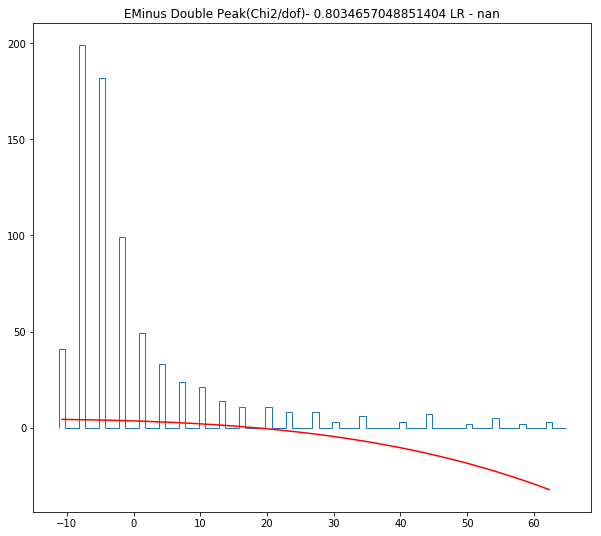

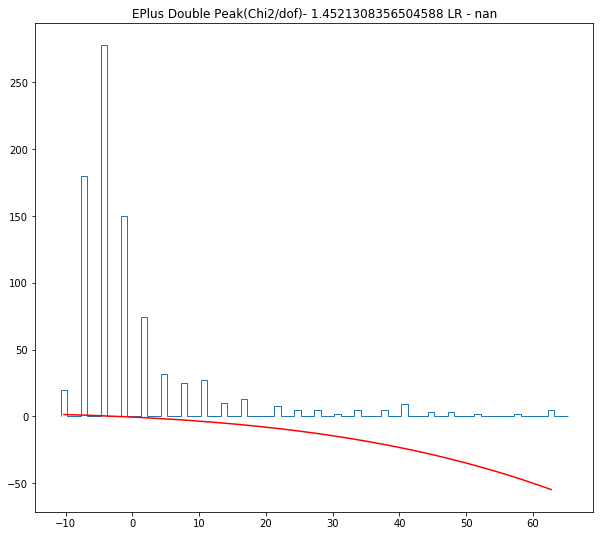

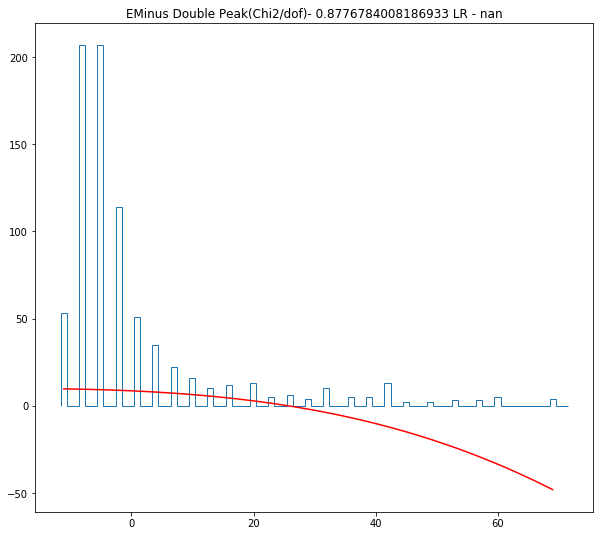

In [16]:
'''
plotting the histograms
'''

for i in range(50, 70):
#for i in select_file_num[10:40]:
    print(select_file_num[i])
    file_name = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    #print('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(select_file_num[i])+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    frameList = []
    j = 0
    while(file_name.more()):
        frameList.append(file_name.pop_daq())
    frame_number = int(select_frame_num[i])
    frame_i = frameList[frame_number]
    mctree = frame_i["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)    
    
    omkey = OMKey(int(select_string[i]), int(select_DOM[i]), 0)
    print(omkey)
    recoPulseMap = frame_i['I3RecoPulses']
    recoPulseList = recoPulseMap[omkey]
    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
    
    '''
    Removing DOMs with hits less than 100 Hits
    '''
    if sum(recoPulse_chargeList) < 100:
        print(sum(recoPulse_chargeList))
        print('exit1')
        continue

    '''
    Calculating the mean and removing the tails
    '''

    #mean = recoPulse_timeList.mean()
    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

    if len(select_time) < 10:
        print('exit2')
        continue

    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

    #[using zscore to remove the effect of outliers from the analysis]
    z = stats.zscore(max_hitTimes)
    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

    if len(max_hitTimes) < 10:
        print('exit3')
        continue

    #Shifting mean to zero
    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
    timestamps = max_hitTimes - max_hitTimes_mean
    final_mean = timestamps.mean()

    '''
    Histogramming the data from simulation
    '''
    print('Now Histogramming')
    bins = np.arange(min(timestamps), max(timestamps), 3)
    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
    #removing bins with < 0 entries ---> Recommended for binned likelihood
    entries_in_bins = num[num > 0]
    bin_centers = bin_centers[num > 0]

    #Degrees of freedom should be greater than zero!
    if len(entries_in_bins) < 8:
        continue

    #Getting data for the chi2 fit
    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
    chi2_bin_centers = bin_centers[entries_in_bins > 10]

    num_dataPoints = len(entries_in_bins)
    area_data = sum(entries_in_bins)
    mean_entries = entries_in_bins.mean()

    '''
    Fitting bifurcated Gaussian and double bifurcated gaussian to
    the mcpe hit time distributions for both tau and electron.
    '''

    #Single Peak

    nll = lambda *args: log_likelihood_biGauss(*args)
    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                    args=(entries_in_bins, bin_centers),
                                    method='Powell',
                                    bounds = bnds_biGauss)

    #Double Peak

    nll = lambda *args: log_likelihood_doublePeak(*args)
    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                args=(entries_in_bins, bin_centers),
                                method='Powell',
                                bounds=bnds_doublePeak)
    
    LR_biGauss = likelihood_ratio_biGauss(bin_centers, entries_in_bins, soln_biGauss.x[0],
                                              soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers, entries_in_bins, soln_doublePeak.x[0],
                                                    soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
    
    '''
    goodness of fit - Chi2 = 2*ln(LR)
    '''
    gof_DOM_biGauss = (2*LR_biGauss)/(num_dataPoints - 4)
    gof_DOM_doublePeak = (2*LR_doublePeak)/(num_dataPoints - 8)
    
    if gof_DOM_doublePeak != gof_DOM_doublePeak:
        print('PARAMETERS -', soln_doublePeak.x[0], soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                    soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                    soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                    soln_doublePeak.x[7])
        
        def log_likelihood_doublePeak_test(theta, n, x):
            pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
            model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
            L = model - (n*np.log(model))
            print('*****************Double Peak***************', int(i), omkey)
            print(theta, np.sum(L))
            return np.sum(L)
        
        
        soln_doublePeak_test = minimize(log_likelihood_doublePeak_test, initial_doublePeak,
                            args=(entries_in_bins, bin_centers),
                            method='Powell',
                            bounds=bnds_doublePeak)
    
        '''
        (x, y) values for the fit
        '''
        #x = bin_centers
        x = np.linspace(min(bin_centers), max(bin_centers), 1000)
        y_biGauss = biGauss(x, soln_biGauss.x[0],
                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
        y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
    
    
                    
        plt.figure(figsize=(10,9))
        _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
        #plt.plot(x, y_biGauss, '-', c = 'k')
        plt.plot(x, y_doublePeak, '-', c = 'r')
        plt.title(str(lepton.type) +' Double Peak(Chi2/dof)- '+ str(select_gof_dp[i])+' LR - '+str(gof_DOM_doublePeak))
        

In [ ]:
# frame_in_file = select_frame_num[select_file_num == i]
    frame_number = 0
    for frame in file:
        for j in frame_in_file:
            if frame_number == int(j):
                mctree = frame["I3MCTree"]
                primary = mctree.primaries
                lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
                
                recoPulseMap = frame['I3RecoPulses']
                select_string_in_frame = select_string[(select_file_num == i) & (select_frame_num == j)]
                
                for k in select_string_in_frame:
                    select_DOM_with_string = select_DOM[(select_file_num == i) & (select_frame_num == j) & (select_string == k)]
                    omkey = OMKey(int(k), int(select_DOM_with_string[0]), 0)
                    print('OMKEY', omkey)
                    print(num)
                    print(i, j, k, int(select_DOM_with_string[0]))
                    print(i, select_frame_num[num], select_string[num], select_DOM[num])
                    select_gof_DOM_biGauss = select_gof_biGauss[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    select_gof_DOM_dp = select_gof_dp[(select_file_num == i) & (select_frame_num == j) & (select_string == k)& (select_DOM == select_DOM_with_string[0])]
                    
                    recoPulseList = recoPulseMap[omkey]
                    recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
                    recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
                    
                    '''
                    Removing DOMs with hits less than 100 Hits
                    '''
                    if sum(recoPulse_chargeList) < 100:
                        print('exit1')
                        continue

                    '''
                    Calculating the mean and removing the tails
                    '''

                    #mean = recoPulse_timeList.mean()
                    mean = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList) #mean is weighted
                    select_time = recoPulse_timeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    select_charge = recoPulse_chargeList[(recoPulse_timeList > mean-50) & (recoPulse_timeList < mean+50)]
                    #print('SELECT CHARGE', select_charge, select_time, mean, recoPulse_timeList, recoPulse_chargeList)

                    if len(select_time) < 10:
                        print('exit2')
                        continue

                    mean_select_time = sum(select_time*select_charge)/sum(select_charge)
                    max_hitTimes = recoPulse_timeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]
                    max_charge = recoPulse_chargeList[(recoPulse_timeList > (mean_select_time-100))&(recoPulse_timeList < (mean_select_time+100))]

                    #[using zscore to remove the effect of outliers from the analysis]
                    z = stats.zscore(max_hitTimes)
                    max_hitTimes = max_hitTimes[(z>-1.6)&(z < 1.2)]
                    max_charge = max_charge[(z>-1.6)&(z < 1.2)]

                    if len(max_hitTimes) < 10:
                        print('exit3')
                        continue

                    #Shifting mean to zero
                    max_hitTimes_mean = sum(max_hitTimes*max_charge)/sum(max_charge)
                    timestamps = max_hitTimes - max_hitTimes_mean
                    final_mean = timestamps.mean()

                    '''
                    Histogramming the data from simulation
                    '''
                    print('Now Histogramming')
                    bins = np.arange(min(timestamps), max(timestamps), 1)
                    num, bin_edges = np.histogram(timestamps, bins=bins, weights=max_charge)
                    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
                    
                    #removing bins with < 0 entries ---> Recommended for binned likelihood
                    entries_in_bins = num[num > 0]
                    bin_centers = bin_centers[num > 0]

                    #Degrees of freedom should be greater than zero!
                    if len(entries_in_bins) < 8:
                        continue

                    #Getting data for the chi2 fit
                    chi2_entries_in_bins = entries_in_bins[entries_in_bins > 10]
                    chi2_bin_centers = bin_centers[entries_in_bins > 10]

                    num_dataPoints = len(entries_in_bins)
                    area_data = sum(entries_in_bins)
                    mean_entries = entries_in_bins.mean()

                    '''
                    Fitting bifurcated Gaussian and double bifurcated gaussian to
                    the mcpe hit time distributions for both tau and electron.
                    '''

                    #Single Peak

                    nll = lambda *args: log_likelihood_biGauss(*args)
                    initial_biGauss = np.array([final_mean, 50, 5, max(entries_in_bins)])
                    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 500), (0, 10), (0, 1e6))
                    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                            args=(entries_in_bins, bin_centers),
                                            method='Powell',
                                            bounds = bnds_biGauss)

                    #Double Peak

                    nll = lambda *args: log_likelihood_doublePeak(*args)
                    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(entries_in_bins), final_mean, 20, 1, max(entries_in_bins)])
                    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 500), (0, 10), (0, 1e6),
                                        (final_mean, max(bin_centers)), (0, 500), (0, 10), (0,1e6))
                    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                                args=(entries_in_bins, bin_centers),
                                                method='Powell',
                                                bounds=bnds_doublePeak)
                    
                    '''
                    (x, y) values for the fit
                    '''
                    #x = bin_centers
                    x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                    y_biGauss = biGauss(x, soln_biGauss.x[0],
                                            soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                    y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                                        soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                        soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
                    
                    plt.figure(figsize=(10,9))
                    _ = plt.hist(timestamps, bins=bins, weights=max_charge, histtype='step')
                    plt.plot(x, y_biGauss, '-', c = 'k')
                    plt.plot(x, y_doublePeak, '-', c = 'r')
                    plt.title(str(lepton.type)+' '+ str(select_gof_DOM_biGauss) +' '+ str(select_gof_DOM_dp))
                
            frame_number += 1    
    num += 1